<h2 align="center">Project Name:- Hotel Booking Demand</h2>  
<h2 align="center"> DSC 478 Final Project</h2>
<h2 align="center">NAWAAZ SHARIF (2015155)</h2>
<h2 align="center"> SYED NOOR RAZI ALI (2070326)</h2>
<h2 align="center"> MOHAMMED RASHIDUDDIN (2070301)</h2>


In [1]:
# importing the necessary modeules and funcition run the KDD process.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors, tree, naive_bayes, ensemble
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, r2_score, roc_auc_score, plot_roc_curve, mean_absolute_error
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pyplt
import plotly.graph_objects as go
import plotly.express as px
from sklearn.metrics import mean_squared_error, mean_absolute_error
import time
import warnings
pd.set_option('display.max_columns', None) 

In [2]:
# Importing the hotel booking dataset.
hotel_bk = pd.read_csv("hotel_bookings.csv")

In [3]:
# Checking the first 10 rows of the dataset.
hotel_bk.head(10)

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   
5  Resort Hotel            0         14               2015               July   
6  Resort Hotel            0          0               2015               July   
7  Resort Hotel            0          9               2015               July   
8  Resort Hotel            1         85               2015               July   
9  Resort Hotel            1         75               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   
5                        27                          1   
6                        27                          1   
7                        27                          1   
8                        27                          1   
9                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   
5                        0                     2       2       0.0       0   
6                        0                     2       2       0.0       0   
7                        0                     2       2       0.0       0   
8                        0                     3       2       0.0       0   
9                        0                     3       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   
5   BB     GBR      Online TA                TA/TO                  0   
6   BB     PRT         Direct               Direct                  0   
7   FB     PRT         Direct               Direct                  0   
8   BB     PRT      Online TA                TA/TO                  0   
9   HB     PRT  Offline TA/TO                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   
5                       0                               0                  A   
6                       0                               0                  C   
7                       0                               0                  C   
8                       0                               0                  A   
9               

In [4]:
# Checking the shape of the dataset.
hotel_bk.shape

(119390, 32)

In [5]:
# Checking the concise summary of the dataframe.
hotel_bk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
# Check the missing values in the dataset.
hotel_bk.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [7]:
# Describing all variables/columns of the dataset.
hotel_bk.describe(include='all')

hotel    is_canceled      lead_time  arrival_date_year  \
count       119390  119390.000000  119390.000000      119390.000000   
unique           2            NaN            NaN                NaN   
top     City Hotel            NaN            NaN                NaN   
freq         79330            NaN            NaN                NaN   
mean           NaN       0.370416     104.011416        2016.156554   
std            NaN       0.482918     106.863097           0.707476   
min            NaN       0.000000       0.000000        2015.000000   
25%            NaN       0.000000      18.000000        2016.000000   
50%            NaN       0.000000      69.000000        2016.000000   
75%            NaN       1.000000     160.000000        2017.000000   
max            NaN       1.000000     737.000000        2017.000000   

       arrival_date_month  arrival_date_week_number  \
count              119390             119390.000000   
unique                 12                       NaN   
top                August                       NaN   
freq                13877                       NaN   
mean                  NaN                 27.165173   
std                   NaN                 13.605138   
min                   NaN                  1.000000   
25%                   NaN                 16.000000   
50%                   NaN                 28.000000   
75%                   NaN                 38.000000   
max                   NaN                 53.000000   

        arrival_date_day_of_month  stays_in_weekend_nights  \
count               119390.000000            119390.000000   
unique                        NaN                      NaN   
top                           NaN                      NaN   
freq                          NaN                      NaN   
mean                    15.798241                 0.927599   
std                      8.780829                 0.998613   
min                      1.000000                 0.000000   
25%                      8.000000                 0.000000   
50%                     16.000000                 1.000000   
75%                     23.000000                 2.000000   
max                     31.000000                19.000000   

        stays_in_week_nights         adults       children         babies  \
count          119390.000000  119390.000000  119386.000000  119390.000000   
unique                   NaN            NaN            NaN            NaN   
top                      NaN            NaN            NaN            NaN   
freq                     NaN            NaN            NaN            NaN   
mean                2.500302       1.856403       0.103890       0.007949   
std                 1.908286       0.579261       0.398561       0.097436   
min                 0.000000       0.000000       0.000000       0.000000   
25%                 1.000000       2.000000       0.000000       0.000000   
50%                 2.000000       2.000000       0.000000       0.000000   
75%                 3.000000       2.000000       0.000000       0.000000   
max                50.000000      55.000000      10.000000      10.000000   

          meal country market_segment distribution_channel  is_repeated_guest  \
count   119390  118902         119390               119390      119390.000000   
unique       5     177              8                    5                NaN   
top         BB     PRT      Online TA                TA/TO                NaN   
freq     92310   48590          56477                97870                NaN   
mean       NaN     NaN            NaN                  NaN           0.031912   
std        NaN     NaN            NaN                  NaN           0.175767   
min        NaN     NaN            NaN                  NaN           0.000000   
25%        NaN     NaN            NaN                  NaN           0.000000   
50%        NaN     NaN            NaN                  NaN           0.000000   
75%        NaN     

## Data Pre-Processing
### Cleaning the Dataset

In [8]:
# Drop unnecessary variables.
#Droppin g the reservation_status_date because the we already have arrival_date_month,arrival_date_day_of_month,arrival_date_year
#Dropping the reservation_status because it has same values to is_cancelled column
hotel_bk.drop(columns=['company', 'reservation_status_date','reservation_status'], inplace=True)

In [9]:
# We are replacing missing values for children with zero, missing values in country is replaced
#missing values in agent is replaced with 0.
missing_values = {"children": 0.0, "country": "Unknown", "agent": 0}
hotel_bk=hotel_bk.fillna(missing_values)

In [10]:
# In the dataset, Undefined/SC have same details mentioned in the dataset
hotel_bk['meal'].replace('Undefined', 'SC', inplace=True)

In [11]:
# Cleaning the dataset when we have zero occupancy in adults, children and babies that no one visited the hotel
zero_guest = list(hotel_bk.loc[hotel_bk['adults'] + hotel_bk['children'] + hotel_bk['babies']==0].index)

hotel_bk.drop(hotel_bk.index[zero_guest], inplace=True)

In [12]:
# Verifying the rows are removed from the dataset.
hotel_bk.shape

(119210, 29)

In [13]:
# Creating a list of Categorical Variables.
categor_var = ['agent', 'arrival_date_year', 'arrival_date_day_of_month', 'arrival_date_week_number', 'arrival_date_month', 'is_repeated_guest', 'distribution_channel', 'is_canceled', 'hotel', 'meal', 'country', 'market_segment', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type']
# Creating a list of continous variables.
continous_var = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


## Histograms

### The Distribution of all Categorical Variables in Histograms

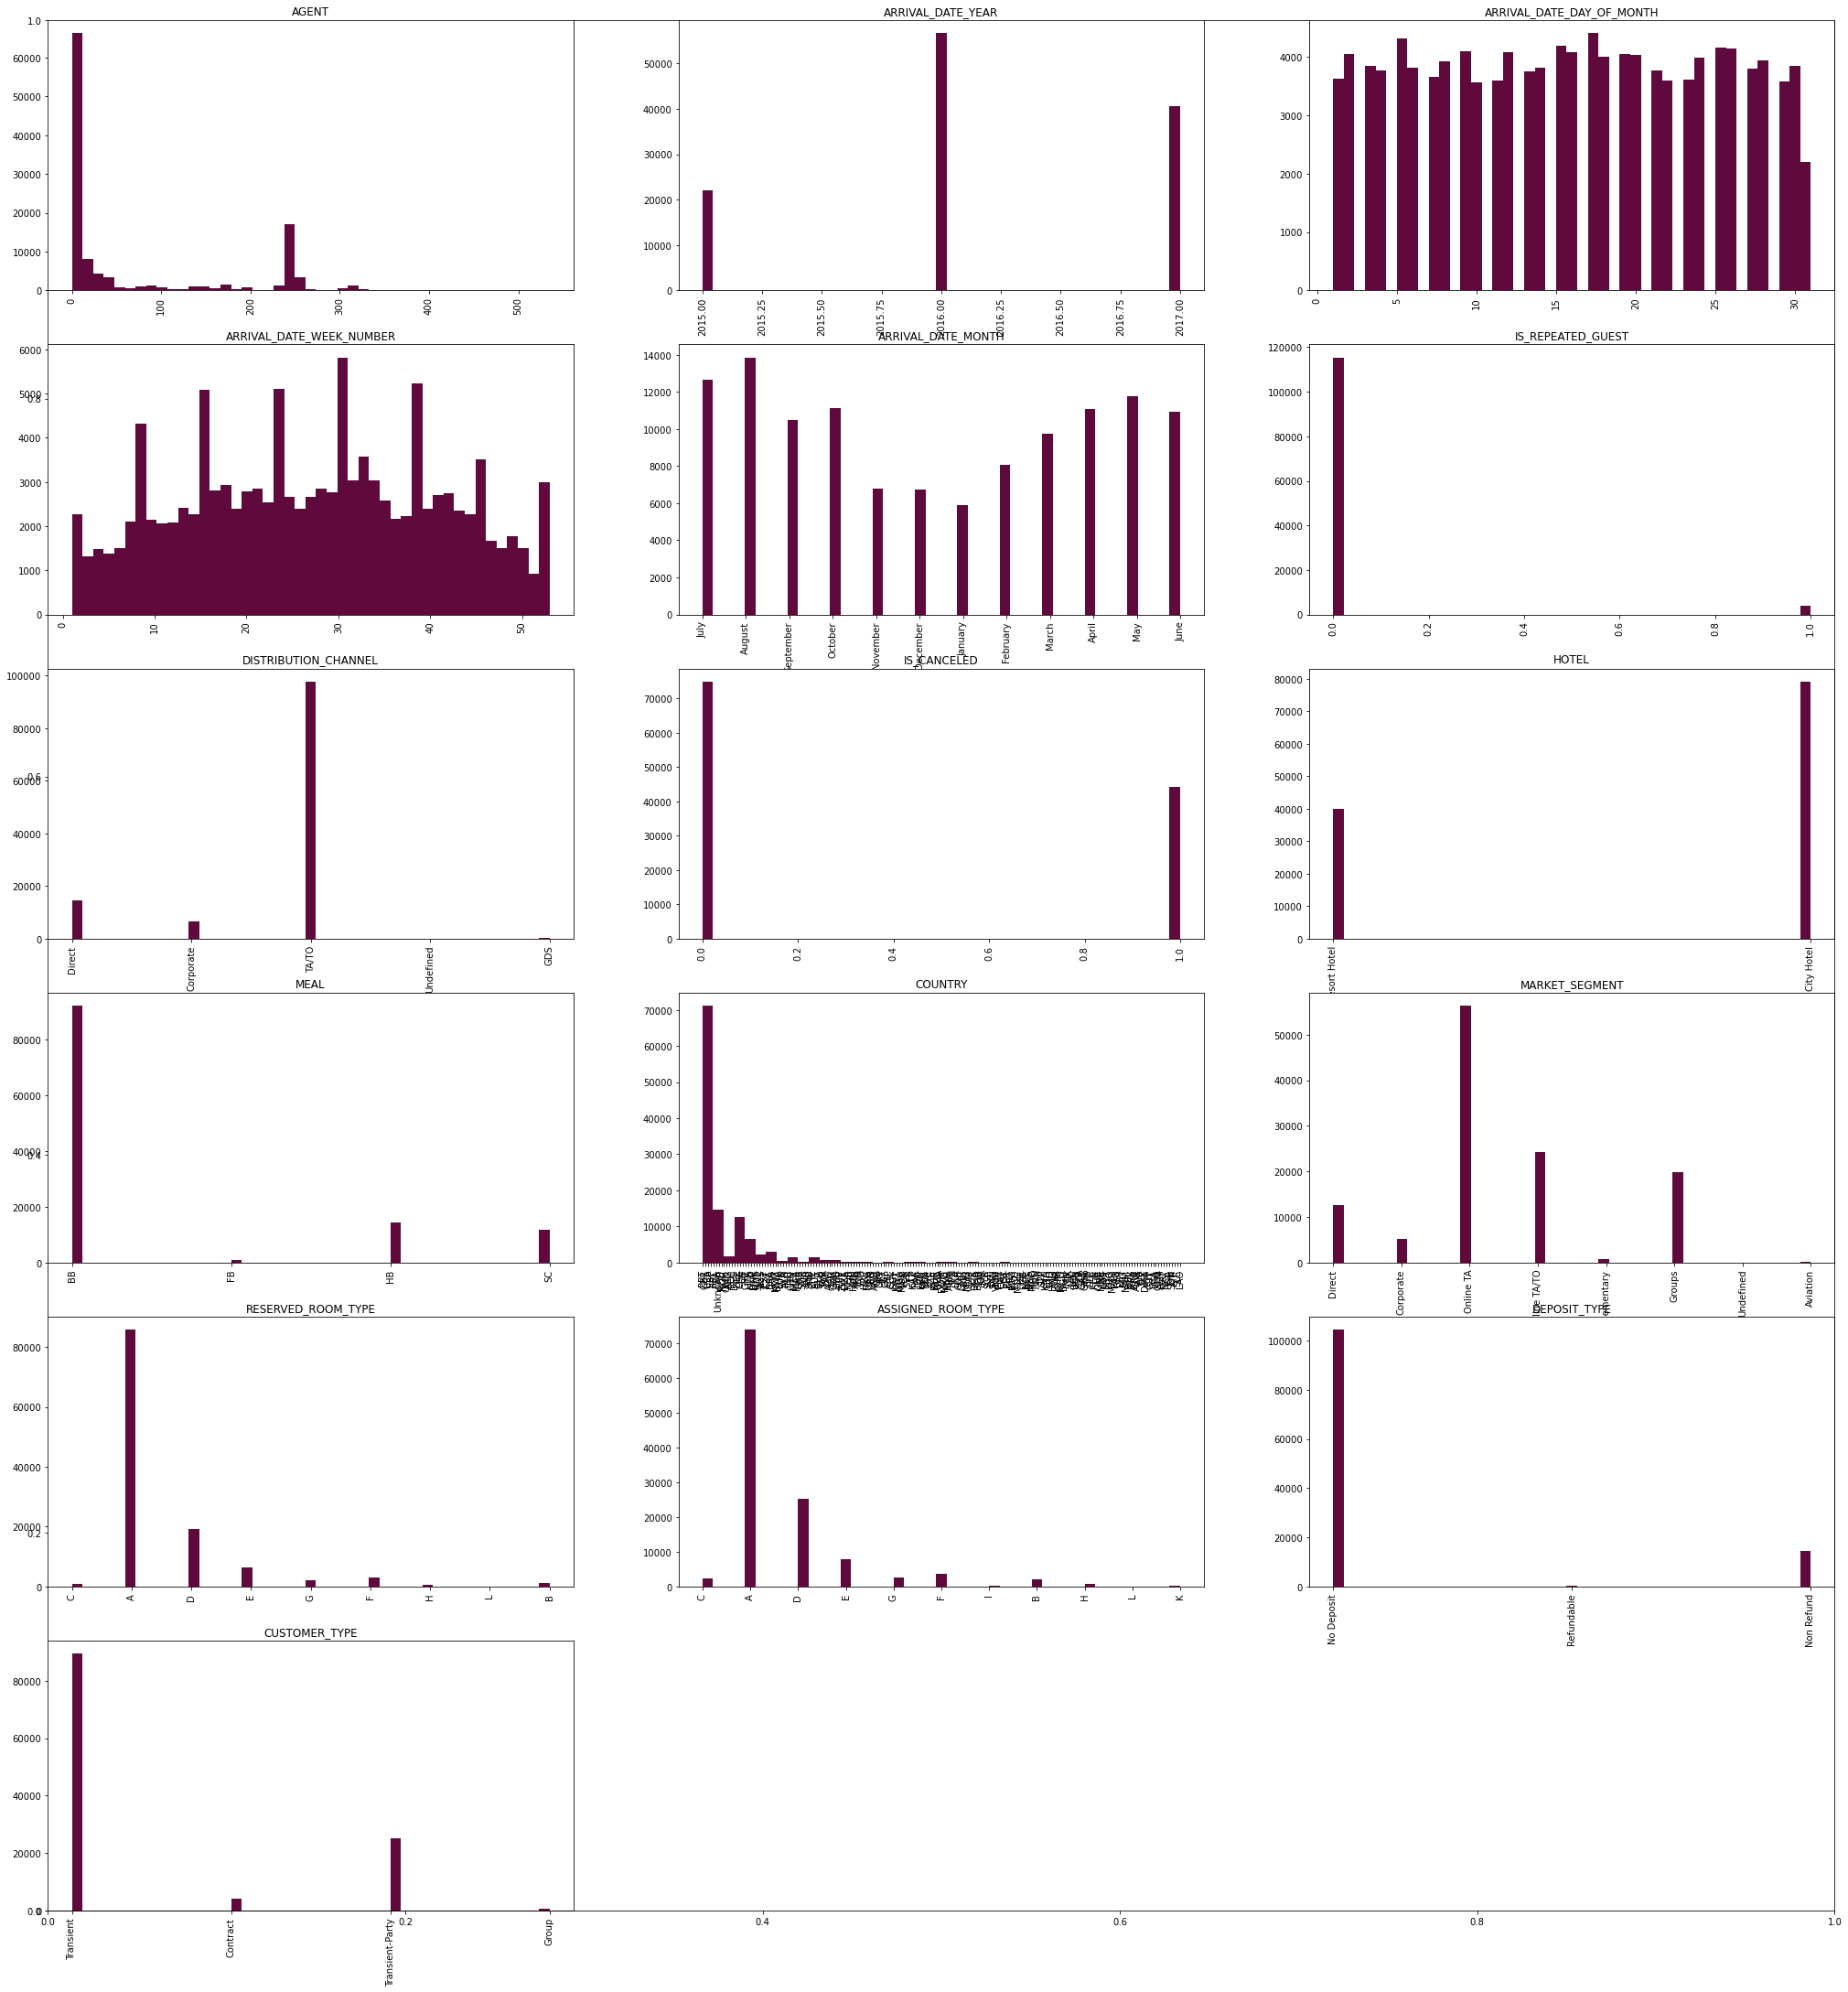

In [14]:
fig, ax = plt.subplots(figsize=(35, 38))
for i , val in enumerate(categor_var):
    ax=fig.add_subplot(6,3,i+1)
    plt.hist(hotel_bk[val], color='#5F093D' , bins=45)
    plt.xticks(rotation=90)
    plt.title(val.upper())

### The above histograms represent all the categorical variables available in our dataset.
#### From the histograms we can get the basic information such as:
#### 1. AGENT: which agent gets the highest number of bookings and which does not.
#### 2. ARRIVAL_DATE_YEAR: which year had the highest number of guests, in our case we had highest guests in 2016.
#### 3. ARRIVAL_DATE_DAY_OF_MONTH: which day of the month had the highest number of guests.
#### 4. ARRIVAL_DATE_WEEK_NUMBER: which week of the year had the highest number of guets.
#### 5. ARRIVAL_DATE_MONTH: we can see that we had highest number of guests in the months of May, June, July and August.
#### 6. IS_REPEATED_GUEST: how many of our guests are repeated, in our case not many guests are repeated.
#### 7. DISTRIBUTION CHANNEL: in our dataset most of the guests book their hotels with the help of Travel Agents(TA) and Tour Operators(TO).
#### 8. IS_CANCELLED: we get to know that how many of our guests have cancelled their stay, which is likely to be helpful in the future.
#### 9. HOTEL: we have more guests that prefer city hotel over resort hotel.
#### 10. MEAL: we can see that most of our guests prefer BB meal.
#### 11. COUNTRY: most of our guests are from PRT which makes sense as the hotels are located in PRT itself.
#### 12. MARKET SEGMENT: most of our bookings come from Online Travel AGents.
#### 13. RESERVED_ROOM_TYPE/ ASSIGNED ROOM TYPE: our guests prefer room A above other rooms.
#### 14. DEPOSIT TYPE: most of the bookings does not have prior deposits.
#### 15. CUSTOMER TYPE: most of our customers are transient types.

## The Top 10 values in the continous variables.

In [15]:
# Top 10 values in continous variables
for i in continous_var:
    print(i.upper())
    print(hotel_bk[i].value_counts()[:10])

LEAD_TIME
0     6264
1     3445
2     2065
3     1815
4     1710
5     1563
6     1444
7     1329
8     1138
12    1079
Name: lead_time, dtype: int64
STAYS_IN_WEEKEND_NIGHTS
0    51895
2    33266
1    30615
4     1847
3     1252
6      152
5       77
8       58
7       19
9       10
Name: stays_in_weekend_nights, dtype: int64
STAYS_IN_WEEK_NIGHTS
2     33670
1     30292
3     22241
5     11068
4      9543
0      7572
6      1494
10     1030
7      1024
8       654
Name: stays_in_week_nights, dtype: int64
ADULTS
2     89680
1     23027
3      6202
0       223
4        62
26        5
27        2
20        2
5         2
40        1
Name: adults, dtype: int64
CHILDREN
0.0     110620
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64
BABIES
0     118293
1        900
2         15
10         1
9          1
Name: babies, dtype: int64
PREVIOUS_CANCELLATIONS
0     112731
1       6048
2        114
3         65
24        48
11        35
4         31
26        

## Correlation Map for Continous Variables.

<AxesSubplot:>

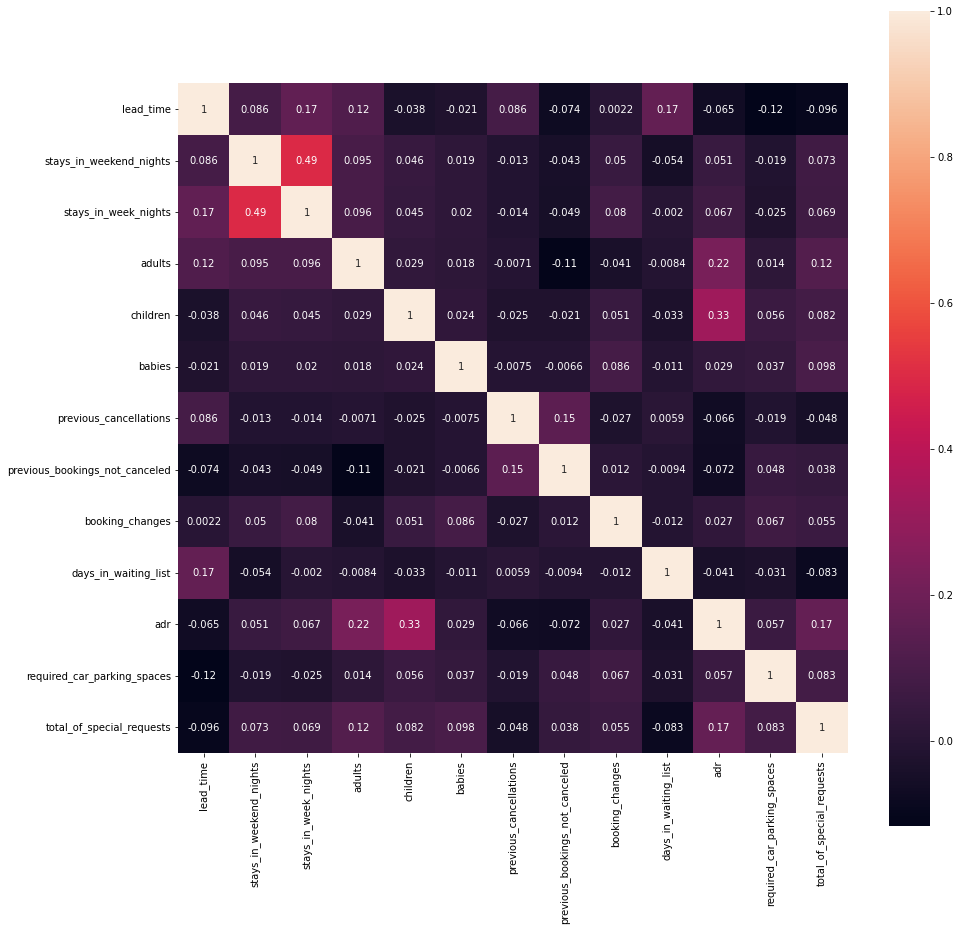

In [16]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(hotel_bk[continous_var].corr(),annot=True , square=True)

### From the above correlation matrix, we can see that few features have correlation of above 0.1 like ADR ,adult children and the babies, the correlation of ADR and adults is of 0.2 which is low correlated and the correlation of ADR and children is 0.33 which is the moderately correlated and the correlation of ADR, and babies is 0.029. The highest correlation is of stays_in_week_nights to stays_in_weekend_nights of 0.49 which is highly correlated when compared to all the variables.

## Top 15 countried where Guests came to reside.

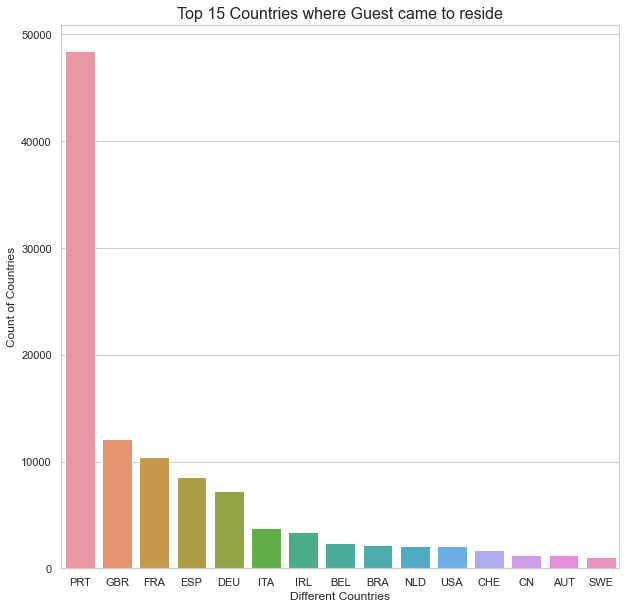

In [17]:
country_values = hotel_bk['country'].value_counts()

countries_values = pd.DataFrame({'country_idx':country_values.index, 'country_count':country_values.values})
countries_values = countries_values.head(15)

plt.figure(figsize = (10,10))
sns.set_theme(style='whitegrid', palette ='Accent')
sns.barplot(data = countries_values,x = 'country_idx', y = 'country_count' )
plt.ylabel('Count of Countries')
plt.xlabel('Different Countries')
plt.title('Top 15 Countries where Guest came to reside', fontsize = 16)
plt.show()

### From the above bar chart we can infer that most of the guests came from Portugal to reside in the hotel as we progress we can see a gradual decrease in count with a difference of 40,000 when compared to the top country and the second country. The following countries where the guests came from is Great Britain, France, Spain and Germany with the count similar to 10,000 Guests.

In [18]:
# Dropping the highest value in adr with no records similar to it.
hotel_bk[hotel_bk['adr']>5000]
hotel_bk.drop([48515], axis=0, inplace=True)

### Visual Representation of the Hotel Column in Pie Chart

In [19]:
lab_meal = hotel_bk['hotel'].unique()
val_meal = hotel_bk['hotel'].value_counts()
palette = ["magma"]

fig = go.Figure(data=[go.Pie(labels = lab_meal, 
                             values = val_meal, 
                             hole=.3, 
                             title = 'Resort hotel V City Hotel', 
                             legendgroup = True, 
                             pull = [0.01, 0.01, 0.01, 0.01]
                            )
                     ]
               )

fig.update_traces(marker = dict(colors = palette))

fig.show()

### From the above pie chart we can infer that the most often guest came to reside in city hotel. When compared to the resort hotel, we can see a 66.4% of the total guest occupancy  in the city hotel when compared to 33.6% of total guest came to the enjoy in resort hotel.
### We can also infer that the most demanded hotel is the city hotel.

### Statistical Map showing Nationality of vistors from around the world.
#### THe geograohical areas are coloured where people came to stay in the hotel.

In [20]:
guests_home = hotel_bk[hotel_bk['is_canceled'] == 0].groupby(['country']).size().reset_index(name = 'count')


px.choropleth(guests_home,
                    locations = "country",
                    color= "count" ,
                    hover_name= "country", 
                    color_continuous_scale = "dense",
                    projection = 'orthographic',
                    title="Nationality of visitors"
             )

### We have tried a new visualization to do show the nationality of the visitors around the world, this clearly highlights the geographical location where the people came to stay in the hotel. As we can see, from the above choropleth that the most of the visitors were from the European countries and with the highest from Portugal.

### Boxplot and Histogram of Continous Variable

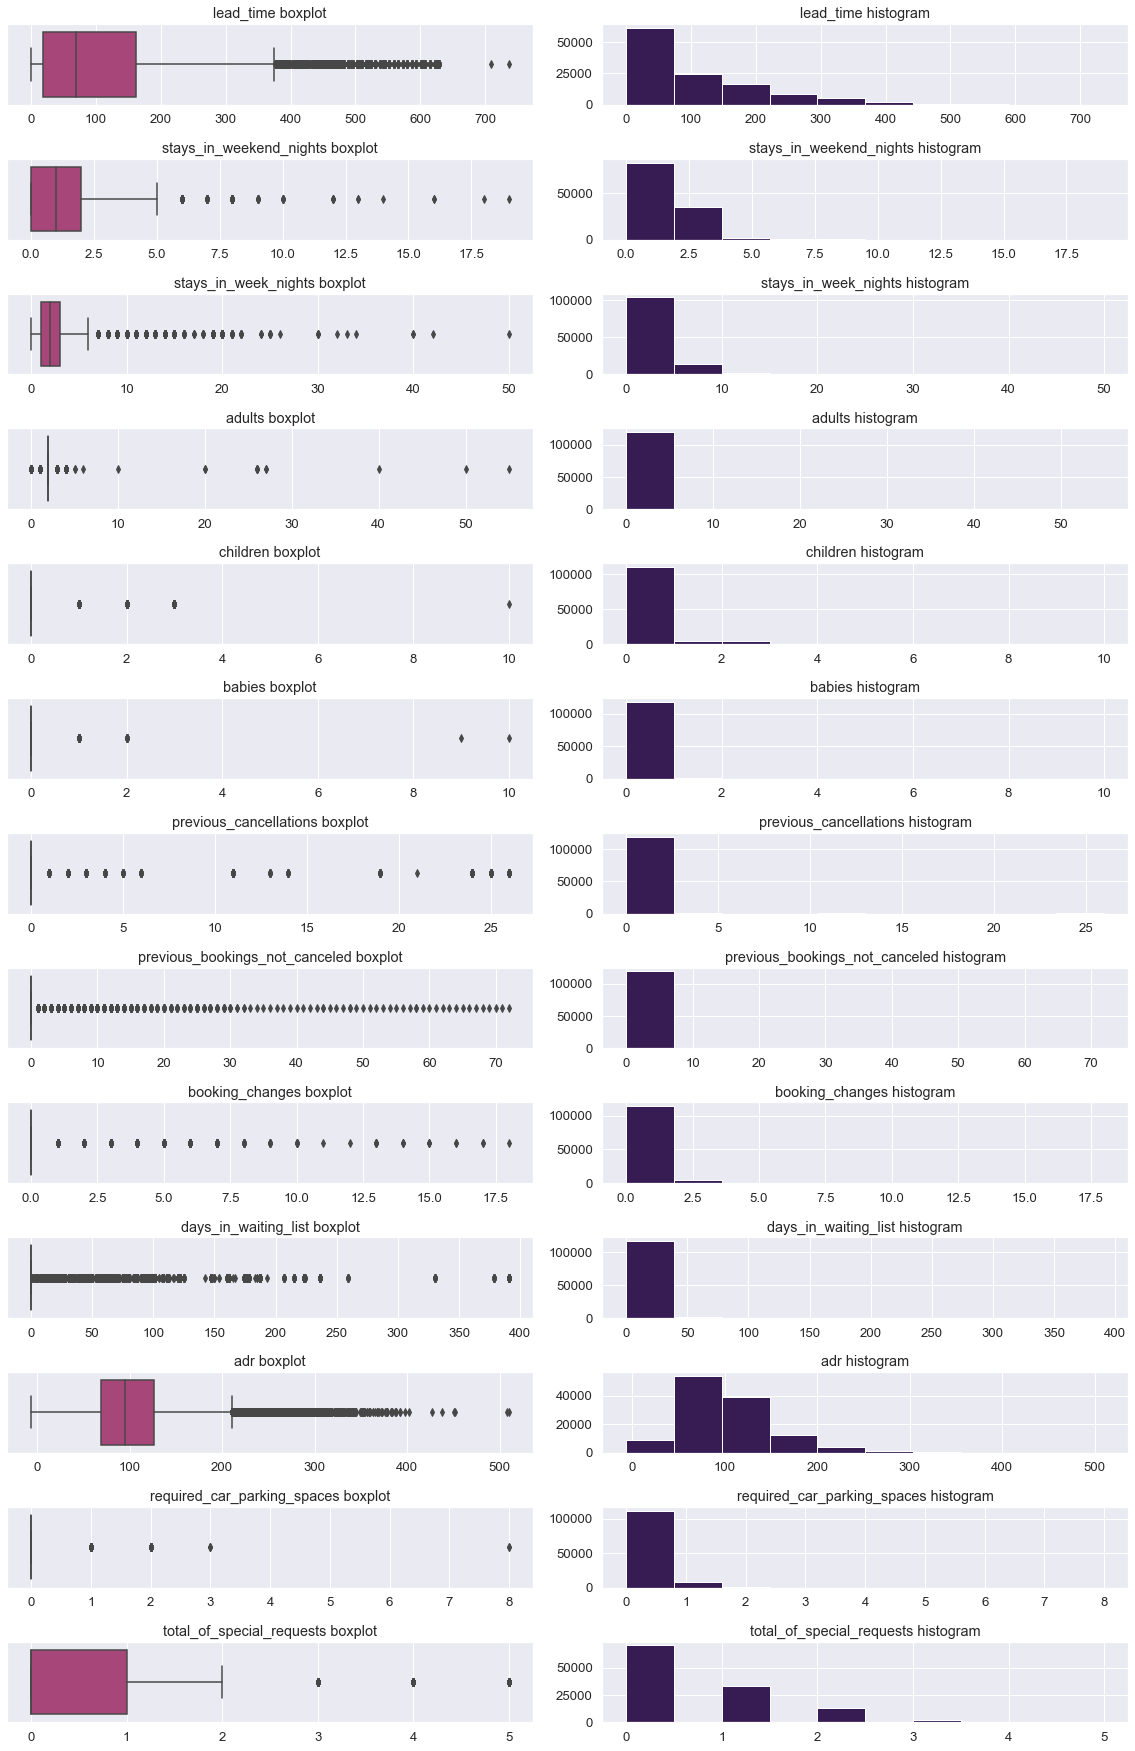

In [21]:
n = 1
sns.set_style('darkgrid')
sns.set(font_scale = 1.2)
plt.figure(figsize = (16, 28))

for feature in continous_var:
    plt.subplot(15,2,n)
    sns.boxplot(x=hotel_bk[feature], palette = 'magma').set(xlabel = None)
    plt.title(f'{feature} boxplot')
    n = n + 1
    
    plt.subplot(15,2,n)
    plt.hist(x=hotel_bk[feature], color = '#371c54')
    plt.title(f'{feature} histogram')
    n = n + 1
    plt.tight_layout()

### We have plotted, a histogram and a box plot for all the continuous variables in our data set. 
1. From the above box plot for the lead time we can infer that most of the outliers are from 400 to 700. Similarly we can infer from the lead time histogram that most of the data is from 0 to 400. The median is near to the lower quartile of the box plot. We can see the lead time is right skewed.

2. For the second box plot stays in weekend nights we can also see that the most of the outliers are from 5 to 17.5 and similarly for its histogram we can see a distribution of data completely to the left from 0 to 2.5 the median is closely related is between the box plot from this weekend in for that, there is no skewness and stays in weekend nights.

3. For stays in the week nights, we can infer that the box plot is very small, and the lower end of the whisker is very close to the lower quartile region of the box plot, and the median is at the center of the box plot and we do see a larger whisker in the box plot for the same histogram. We can see these days in the week and night it’s from 0 to 10 and we see a majority of outliers about 10.

4. For the adult box plot, we don’t see a box plot, clearly similarly for the children and for the babies and four previous cancellations, previous bookings not canceled and booking changes and days in the waiting list and required car parking spaces we don’t see the box plot.

5. For the ADR box plot, we can infer that the lower end, and the upper end of the risk is of the same length, and the median is at the between of the box plot, and we can infer that there is no skewness in the box plot, the same representation goes to the histogram where we see a majority of the data from 0 to 300 that specifies when floating the box plot that the outliers are from 200 to 500.

6. For the total of special request box plot, we can infer that there is no lower end whisker and we see a few outliers present at 3,4and 5.

7. From the above box plot of continuous variable box plot, we can infer that the most of the variables have outliers and sometimes we don’t see the lower end of the whisker or the median itself. this clearly gives us the idea that since the city hotel is more cheaper, when compared to the resort hotels, we can see a most diverse type of guest, residing in the city hotel when compared to an expensive accommodation of resort hotel.

### Representing the univariate dataset using the graphical data analysis in one dimension.

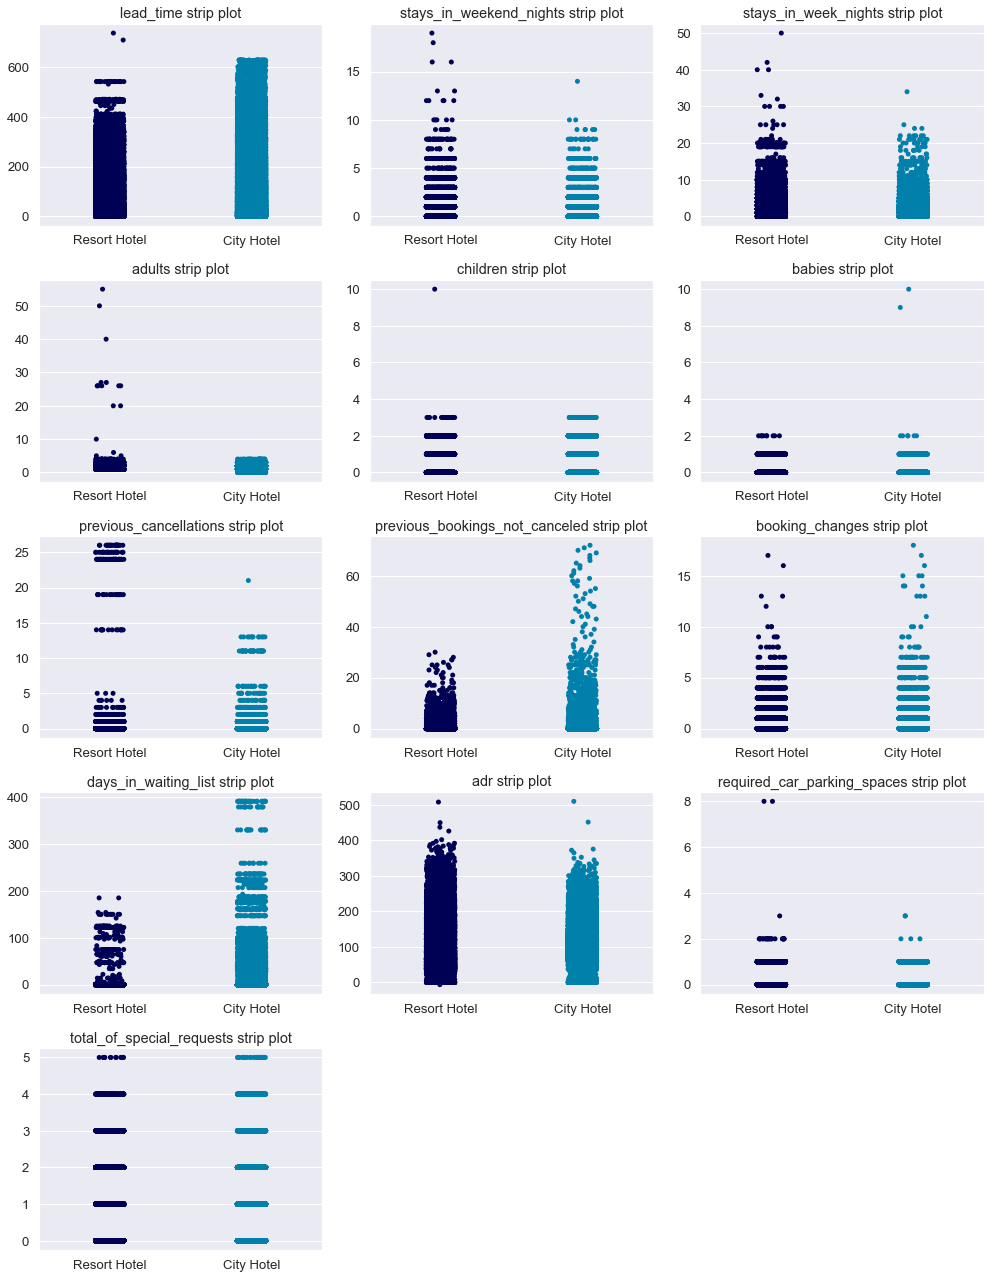

In [22]:
n = 1

sns.set_style('darkgrid')
sns.set(font_scale = 1.2)
plt.figure(figsize = (14, 18))

for feature in continous_var:
    plt.subplot(5,3,n)
    sns.stripplot(x = hotel_bk['hotel'], y = hotel_bk[feature], palette = 'ocean').set(xlabel = None, ylabel = None)
    plt.title(f'{feature} strip plot')
    n = n + 1
    plt.tight_layout()

### The above step lots highlights differences between the resort Hotel and city hotel over several features, such as lead time, stays in week in nights ,stays in week nights, adults, children, babies, previous cancellations, previous bookings not cancel, booking changes, days in waiting list, ADR, required car parking spaces and total of special requests.

### Visualizing which year there was more booking or more cancellations

Text(0.5, 1.0, 'Arriving year, Leadtime and Cancelations')

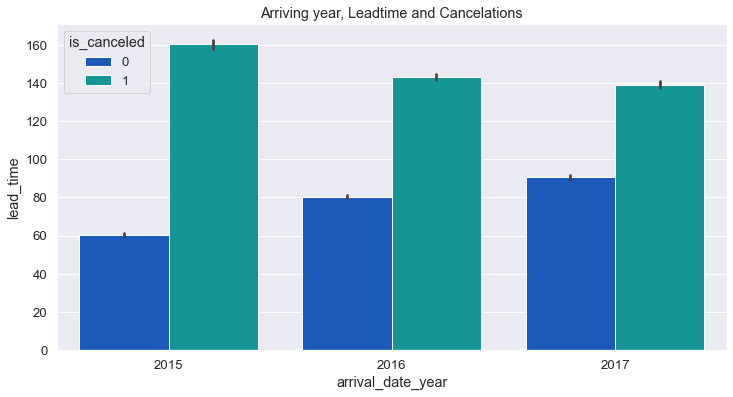

In [23]:
plt.figure(figsize=(12,6))
sns.barplot(x='arrival_date_year', y='lead_time',hue='is_canceled', data= hotel_bk, palette='winter')
plt.title('Arriving year, Leadtime and Cancelations')

### From the above bar plots, we can see that bookings received between the years 2015 and 2017. The bar graph shows if the bookings were cancelled and how many bookings were cancelled in each year.

### Plotting Pie Charts for assigned_room_type,assigned_room_type,market_segment,meal,is_repeated_guest

In [24]:
plot_pie=['assigned_room_type','market_segment','meal','is_repeated_guest']
for i in plot_pie:
    lab_meal = hotel_bk[i].unique()
    val_meal = hotel_bk[i].value_counts()
    palette = ["magma"]

    fig = go.Figure(data=[go.Pie(labels = lab_meal, 
                                 values = val_meal, 
                                 hole=.3, 
                                 title = i, 
                                 legendgroup = True, 
                                 pull = [0.01, 0.01, 0.01, 0.01]
                                )
                         ]
                   )

    fig.update_traces(marker = dict(colors = palette))

    fig.show()

### Using the pie chart, we are showing the distribution of data for features such as assigned room type in which we can see that most of the bookings received were from  room C and the next room that was preferred by the guests was room A; and then for the next segment that is market segment the most of the bookings received were direct and corporate; also for the meal as we can see most of the guest prefer BB meal and FB meal and for their repeated guests, we can see that not much of our guests were repeated.

### Cross-tabulating hotel, is_repeated_guest and is_cancelled.

<AxesSubplot:xlabel='arrival_date_month'>

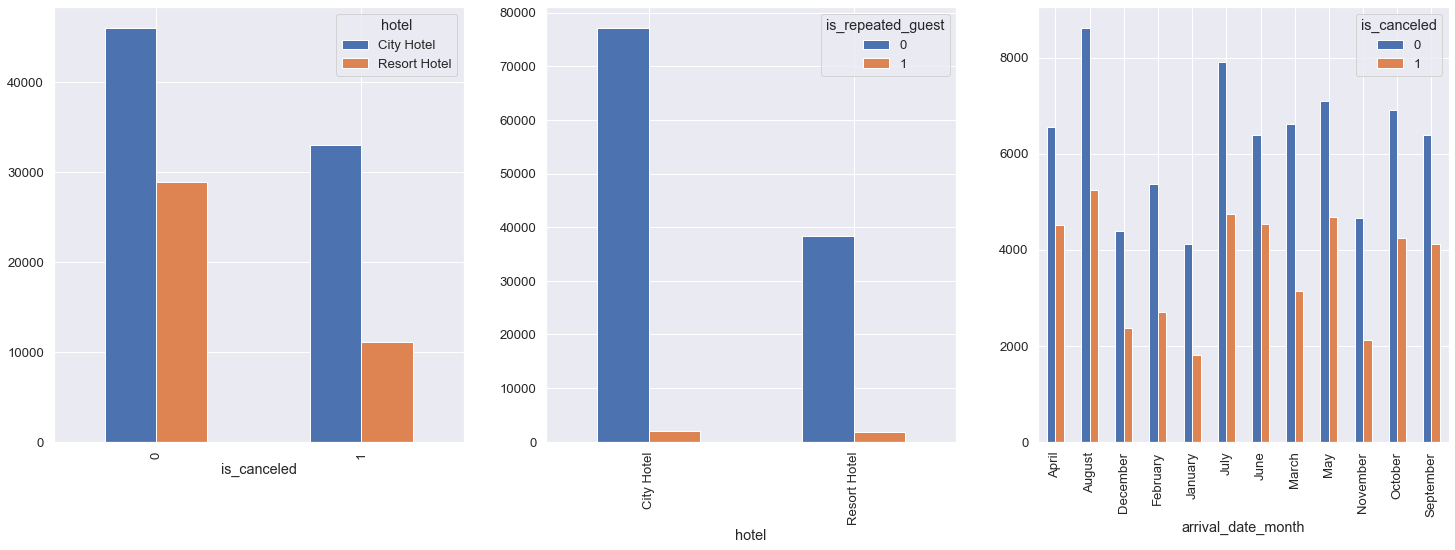

In [25]:
fig, ((ax1, ax2,ax3))  = plt.subplots(nrows=1, ncols=3 , figsize=(25,8))
pd.crosstab(hotel_bk['is_canceled'], hotel_bk['hotel']).plot(kind='bar' , ax=ax1)

pd.crosstab(hotel_bk['hotel'], hotel_bk['is_repeated_guest']).plot(kind='bar' , ax=ax2)
pd.crosstab(hotel_bk['arrival_date_month'], hotel_bk['is_canceled']).plot(kind='bar' , ax=ax3)


### Using crosstab method, we plot the graphs between:
#### hotel and is_cancelled: we can see which hotel has how many cancellations.
#### hotel and is_repeated_guest: we can see which hotel has how many repeated guests.
#### arrival_date_month and is_cancelled: which month has the highest number of cancellations; in our case AUGUST has highest number of bookings as well as cancellations.

### Converting the Labels to numericak form [converting categorical to numerical variable]

In [26]:
#using the label encoder to convert the numerical variables to categorical variables.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label_hotel = le.fit_transform(hotel_bk['hotel'])
hotel_bk['hotel_encoded'] = label_hotel

label_adm = le.fit_transform(hotel_bk['arrival_date_month'])
hotel_bk['arrival_date_month_encoded'] = label_adm

label_country = le.fit_transform(hotel_bk['country'])
hotel_bk['country_encoded'] = label_country

label_meal = le.fit_transform(hotel_bk['meal'])
hotel_bk['meal_encoded'] = label_meal

label_ms = le.fit_transform(hotel_bk['market_segment'])
hotel_bk['market_segment_encoded'] = label_ms

label_dc = le.fit_transform(hotel_bk['distribution_channel'])
hotel_bk['distribution_channel_encoded'] = label_dc

label_rrt = le.fit_transform(hotel_bk['reserved_room_type'])
hotel_bk['reserved_room_type_encoded'] = label_rrt

label_art = le.fit_transform(hotel_bk['assigned_room_type'])
hotel_bk['assigned_room_type_encoded'] = label_art

label_dt = le.fit_transform(hotel_bk['deposit_type'])
hotel_bk['deposit_type_encoded'] = label_dt


label_ct = le.fit_transform(hotel_bk['customer_type'])
hotel_bk['customer_type_encoded'] = label_ct


In [27]:
# Checking the dataset with all the encoded columns
hotel_bk

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  children  babies meal country  \
0                          0       2       0.0       0   BB     PRT   
1                          0       2       0.0       0   BB     PRT   
2                          1       1       0.0       0   BB     GBR   
3                          1       1       0.0       0   BB     GBR   
4                          2       2       0.0       0   BB     GBR   
...                      ...     ...       ...     ...  ...     ...   
119385                     5       2       0.0       0   BB     BEL   
119386                     5       3       0.0       0   BB     FRA   
119387                     5       2       0.0       0   BB     DEU   
119388                     5       2       0.0       0   BB     GBR   
119389                     7       2       0.0       0   HB     DEU   

       market_segment distribution_channel  is_repeated_guest  \
0              Direct               Direct                  0   
1              Direct               Direct                  0   
2              Direct               Direct                  0   
3           Corporate            Corporate                  0   
4           Online TA                TA/TO                  0   
...               ...                  ...                ...   
119385  Offline TA/TO                TA/TO                  0   
119386      Online TA                TA/TO                  0   
119387      Online TA                TA/TO                  0   
119388      Online TA                TA/TO                  0   
119389      Online TA                TA/TO                  0   

        previous_cancellations  previous_bookings_not_canceled  \
0                            0                               0   
1                            0        

In [28]:
# Creating a new dataframe, with only the encoded values and the numerical columns.
hotel_bk_encoded=hotel_bk[['hotel_encoded','is_canceled','arrival_date_month_encoded',
       'country_encoded', 'meal_encoded', 'market_segment_encoded',
       'distribution_channel_encoded', 'reserved_room_type_encoded',
       'deposit_type_encoded','assigned_room_type_encoded', 'customer_type_encoded',
       'lead_time','arrival_date_year','arrival_date_week_number','arrival_date_day_of_month','stays_in_weekend_nights','stays_in_week_nights','adults','children','babies','is_repeated_guest','previous_cancellations','previous_bookings_not_canceled',
'booking_changes','agent','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests']]

In [29]:
hotel_bk_encoded

hotel_encoded  is_canceled  arrival_date_month_encoded  \
0                   1            0                           5   
1                   1            0                           5   
2                   1            0                           5   
3                   1            0                           5   
4                   1            0                           5   
...               ...          ...                         ...   
119385              0            0                           1   
119386              0            0                           1   
119387              0            0                           1   
119388              0            0                           1   
119389              0            0                           1   

        country_encoded  meal_encoded  market_segment_encoded  \
0                   135             0                       3   
1                   135             0                       3   
2                    59             0                       3   
3                    59             0                       2   
4                    59             0                       6   
...                 ...           ...                     ...   
119385               15             0                       5   
119386               56             0                       6   
119387               43             0                       6   
119388               59             0                       6   
119389               43             2                       6   

        distribution_channel_encoded  reserved_room_type_encoded  \
0                                  1                           2   
1                                  1                           2   
2                                  1                           0   
3                                  0                           0   
4                                  3                           0   
...                              ...                         ...   
119385                             3                           0   
119386                             3                           4   
119387                             3                           3   
119388                             3                           0   
119389                             3                           0   

        deposit_type_encoded  assigned_room_type_encoded  \
0                          0                           2   
1                          0                           2   
2                          0                           2   
3                          0                           0   
4                          0                           0   
...                      ...                         ...   
119385                     0                           0   
119386                     0                           4   
119387                     0                           3   
119388                     0                           0   
119389                     0                           0   

        customer_type_encoded  lead_time  arrival_date_year  \
0                           2        342               2015   
1                           2        737               2015   
2                           2          7               2015   
3                           2         13               2015   
4                           2         14               2015   
...                       ...        ...                ...   
119385                      2         23               2017   
119386                      2        102               2017   
119387                      2         34               2017   
119388                      2        109               2017   
119389                      2        205               2017   

        arrival_date_week_number  arrival_date_day_of_month  \
0                             27                          1   
1            

In [30]:
# Normalizaing the dataset using Min Max scaler.
min_max_scaler = preprocessing.MinMaxScaler().fit(hotel_bk_encoded)

In [31]:
# Verifying the columns.
hotel_bk_encoded.columns

Index(['hotel_encoded', 'is_canceled', 'arrival_date_month_encoded',
       'country_encoded', 'meal_encoded', 'market_segment_encoded',
       'distribution_channel_encoded', 'reserved_room_type_encoded',
       'deposit_type_encoded', 'assigned_room_type_encoded',
       'customer_type_encoded', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [32]:
# Applying Min Max Transformation.
hotel_bk_encoded
hotel_bk_encoded_norm = min_max_scaler.transform(hotel_bk_encoded )

In [33]:
# Converting it into a dataframe using columns names from encoded df.
hotel_bk_encoded_norm= pd.DataFrame(hotel_bk_encoded_norm, columns = hotel_bk_encoded.columns  )
hotel_bk_encoded_norm.head()

hotel_encoded  is_canceled  arrival_date_month_encoded  country_encoded  \
0            1.0          0.0                    0.454545         0.762712   
1            1.0          0.0                    0.454545         0.762712   
2            1.0          0.0                    0.454545         0.333333   
3            1.0          0.0                    0.454545         0.333333   
4            1.0          0.0                    0.454545         0.333333   

   meal_encoded  market_segment_encoded  distribution_channel_encoded  \
0           0.0                0.428571                          0.25   
1           0.0                0.428571                          0.25   
2           0.0                0.428571                          0.25   
3           0.0                0.285714                          0.00   
4           0.0                0.857143                          0.75   

   reserved_room_type_encoded  deposit_type_encoded  \
0                        0.25                   0.0   
1                        0.25                   0.0   
2                        0.00                   0.0   
3                        0.00                   0.0   
4                        0.00                   0.0   

   assigned_room_type_encoded  customer_type_encoded  lead_time  \
0                         0.2               0.666667   0.464043   
1                         0.2               0.666667   1.000000   
2                         0.2               0.666667   0.009498   
3                         0.0               0.666667   0.017639   
4                         0.0               0.666667   0.018996   

   arrival_date_year  arrival_date_week_number  arrival_date_day_of_month  \
0                0.0                       0.5                        0.0   
1                0.0                       0.5                        0.0   
2                0.0                       0.5                        0.0   
3                0.0                       0.5                        0.0   
4                0.0                       0.5                        0.0   

   stays_in_weekend_nights  stays_in_week_nights    adults  children  babies  \
0                      0.0                  0.00  0.036364       0.0     0.0   
1                      0.0                  0.00  0.036364       0.0     0.0   
2                      0.0                  0.02  0.018182       0.0     0.0   
3                      0.0                  0.02  0.018182       0.0     0.0   
4                      0.0                  0.04  0.036364       0.0     0.0   

   is_repeated_guest  previous_cancellations  previous_bookings_not_canceled  \
0                0.0                     0.0                             0.0   
1                0.0                     0.0                             0.0   
2                0.0                     0.0                             0.0   
3                0.0                     0.0                             0.0   
4                0.0                     0.0                             0.0   

   booking_changes     agent  days_in_waiting_list       adr  \
0         0.166667  0.000000                   0.0  0.012355   
1         0.222222  0.000000                   0.0  0.012355   
2         0.000000  0.000000                   0.0  0.157597   
3         0.000000  0.568224                   0.0  0.157597   
4         0.000000  0.448598                   0.0  0.202138   

   required_car_parking_spaces  total_of_special_requests  
0                          0.0                        0.0  
1                          0.0                        0.0  
2                          0.0                        0.0  
3                          0.0                        0.0  
4                          0.0                        0.2

## Classification
## Techniques [KNN, Decision Tree, Multinominal Naive Bayes, SVM, Random Forest, Neural Network and Gradient Descent]
### Hotel is the Target Variable.

In [34]:
# We are performing classification using HOTEL as the target variable
# We have two set of data in our target variable 0 for City Hotel and 1 for Resort Hotel
hotel_target = hotel_bk_encoded_norm['hotel_encoded']
independent_var = hotel_bk_encoded_norm.iloc[:, 1:]

In [35]:
# Checking our target variable.
hotel_target

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
119204    0.0
119205    0.0
119206    0.0
119207    0.0
119208    0.0
Name: hotel_encoded, Length: 119209, dtype: float64

In [36]:
# Independent Variables contributing to predict the target variable.
independent_var

is_canceled  arrival_date_month_encoded  country_encoded  \
0               0.0                    0.454545         0.762712   
1               0.0                    0.454545         0.762712   
2               0.0                    0.454545         0.333333   
3               0.0                    0.454545         0.333333   
4               0.0                    0.454545         0.333333   
...             ...                         ...              ...   
119204          0.0                    0.090909         0.084746   
119205          0.0                    0.090909         0.316384   
119206          0.0                    0.090909         0.242938   
119207          0.0                    0.090909         0.333333   
119208          0.0                    0.090909         0.242938   

        meal_encoded  market_segment_encoded  distribution_channel_encoded  \
0           0.000000                0.428571                          0.25   
1           0.000000                0.428571                          0.25   
2           0.000000                0.428571                          0.25   
3           0.000000                0.285714                          0.00   
4           0.000000                0.857143                          0.75   
...              ...                     ...                           ...   
119204      0.000000                0.714286                          0.75   
119205      0.000000                0.857143                          0.75   
119206      0.000000                0.857143                          0.75   
119207      0.000000                0.857143                          0.75   
119208      0.666667                0.857143                          0.75   

        reserved_room_type_encoded  deposit_type_encoded  \
0                            0.250                   0.0   
1                            0.250                   0.0   
2                            0.000                   0.0   
3                            0.000                   0.0   
4                            0.000                   0.0   
...                            ...                   ...   
119204                       0.000                   0.0   
119205                       0.500                   0.0   
119206                       0.375                   0.0   
119207                       0.000                   0.0   
119208                       0.000                   0.0   

        assigned_room_type_encoded  customer_type_encoded  lead_time  \
0                              0.2               0.666667   0.464043   
1                              0.2               0.666667   1.000000   
2                              0.2               0.666667   0.009498   
3                              0.0               0.666667   0.017639   
4                              0.0               0.666667   0.018996   
...                            ...                    ...        ...   
119204                         0.0               0.666667   0.031208   
119205                         0.4               0.666667   0.138399   
119206                         0.3               0.666667   0.046133   
119207                         0.0               0.666667   0.147897   
119208                         0.0               0.666667   0.278155   

        arrival_date_year  arrival_date_week_number  \
0                     0.0                  0.500000   
1                     0.0                  0.500000   
2                     0.0                  0.500000   
3                     0.0                  0.500000   
4                     0.0                  0.500000   
...                   ...                       ...   
119204                1.0                  0.653846   
119205                1.0                  0.653846   
119206                1.0                  0.653846   
119207                1.0                  0.653846   
119208                1.0                  0.653846   

       

In [37]:
# Splitting the dataset using the hotel as the target variable into train and test dataset.
train, test, target_train, target_test = train_test_split(independent_var, hotel_target, test_size=0.2, random_state=53)

In [38]:
# Set of rows and column in train dataset.
train.shape

(95367, 28)

In [39]:
# Set of rows and column in test dataset.
test.shape

(23842, 28)

##  KNN
### For cross validation we are using Grid Search with cv=10

In [40]:
#  Initializing the KNN classification.
clf = neighbors.KNeighborsClassifier()
# the values of K = 6,7,8,9,10,11,12,17,24
parameters = {'n_neighbors': [6,7,8,9,10,11,12,17,24]}  
#using  grid search as the cross validation technqiue with cv =10
gs_knn = GridSearchCV(clf, parameters, verbose=1, cv=10) 

In [41]:
%%time
gs_knn.fit(train, target_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
Wall time: 39min 21s


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [6, 7, 8, 9, 10, 11, 12, 17, 24]},
             verbose=1)

In [42]:
best_param=gs_knn.best_params_['n_neighbors']
print(f'The best neighbors for KNN is {best_param} and its score is {gs_knn.best_score_}')

The best neighbors for KNN is 7 and its score is 0.9465747828309805


### Considering the best value for KNN and applying it on test dataset.

In [43]:
%%time
# Input of Knn wiht the best neighbors.
clf = neighbors.KNeighborsClassifier(n_neighbors=gs_knn.best_params_['n_neighbors'])  
# KNN fit on train dataset
clf.fit(train, target_train)   
#predicting the value on Test dataset
pred_value_KNN = clf.predict(test)                 
print("Classification Report\n")    # Classification Report
print(classification_report(target_test, pred_value_KNN))

Classification Report

              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96     15757
         1.0       0.94      0.91      0.92      8085

    accuracy                           0.95     23842
   macro avg       0.95      0.94      0.94     23842
weighted avg       0.95      0.95      0.95     23842

Wall time: 1min 10s


### When we take the KNN as the classification metric and hotel as the target variable, we can see a accuracy of 95 percentage that means that the model was able to predict which hotel it was whether it was a city hotel, or a resort hotel, and it was able to achieve a accuracy of 95%.

In [44]:
# Root Mean Square value of KNN
knn_rmse_test = np.sqrt(mean_squared_error(target_test, pred_value_KNN))
print(f'The RMSE value of KNN is {knn_rmse_test}')

The RMSE value of KNN is 0.225744302013999


### Confusion Matrix for KNN

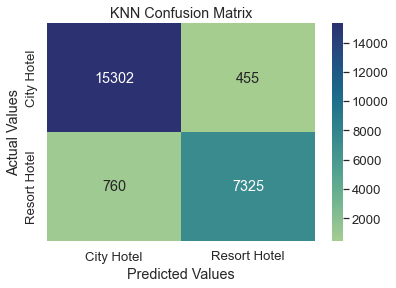

In [45]:
# PLotting the Confusion Matrix
knncm = confusion_matrix(target_test, pred_value_KNN)

ax= plt.subplot()
sns.heatmap(knncm, annot=True, fmt='d', cmap='crest', ax = ax); 

ax.set_xlabel('Predicted Values');ax.set_ylabel('Actual Values'); 
ax.set_title('KNN Confusion Matrix'); 
ax.xaxis.set_ticklabels([ 'City Hotel','Resort Hotel']); 
ax.yaxis.set_ticklabels(['City Hotel','Resort Hotel']);

### From the above confusion, matrix we can infer that most of the hotels were predicted as city hotel since in our data said we had majority of the data points as of city hotel

## Decision Tree
### Classification using Decision Tree using gini and entropy and using the min split from 10 to 90.

In [46]:
#Initializing the Decision Tree classification.
clf_dt = tree.DecisionTreeClassifier()                                                       
parameters = {'criterion': ['gini', 'entropy'], 'min_samples_split': [10,15,30,45,50,75,90]} 
#using  grid search as the cross validation technqiue with cv =10
gs_dt = GridSearchCV(clf_dt, parameters, verbose=1, cv=10)

In [47]:
%%time
# Grid Search Cross validation on train dataset
gs_dt.fit(train, target_train)

Fitting 10 folds for each of 14 candidates, totalling 140 fits
Wall time: 2min 14s


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': [10, 15, 30, 45, 50, 75, 90]},
             verbose=1)

In [48]:
# Best parameters and scores
best_criteria=gs_dt.best_params_['criterion']
min_split=gs_dt.best_params_['min_samples_split']
print(f'The best criteria for Decision Tree is {best_criteria} and the minimum split is {min_split} and the best score is {gs_dt.best_score_} ')

The best criteria for Decision Tree is entropy and the minimum split is 10 and the best score is 0.9800664781040005 


In [49]:
%%time
# giving best crtieria for decision tree
clf_dt = tree.DecisionTreeClassifier(criterion=gs_dt.best_params_['criterion'], min_samples_split=gs_dt.best_params_['min_samples_split'] , max_depth=5)  
# fitting on train dataset
clf_dt.fit(train, target_train)                        
# predicting the value on Test dataset
pred_val_dt = clf_dt.predict(test)                 
print("Classification Report")
print(classification_report(target_test, pred_val_dt))

Classification Report
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94     15757
         1.0       0.95      0.82      0.88      8085

    accuracy                           0.92     23842
   macro avg       0.93      0.90      0.91     23842
weighted avg       0.92      0.92      0.92     23842

Wall time: 627 ms


###  We got on accuracy of 92 percentage, while using decision tree classifier, which tells us that the model was able to predict between the resort hotel and the city hotel, and it is less when compared to KNN classifier.

### Visualizing the Decision Tree

In [50]:
# graphviz of Decision Tree 
import graphviz
from sklearn.tree import export_graphviz
from sklearn import tree

fn_df=train.columns
fn_list=fn_df.values.tolist()
class_names_lst=target_train.unique()
class_names_lst=[",".join(item) for item in class_names_lst.astype(str)]
class_names_lst


OUT_PATH = "C:\\Users\\Abdul Rashid\\Desktop\\Programming Machine Learning\\"
tree.export_graphviz(clf_dt,
                     out_file=OUT_PATH + 'tree.dot',
                     feature_names = fn_list, 
                     class_names=class_names_lst,
                     filled = True)



In [51]:
system(dot -Tpng tree.dot -o tree_gini.png)

[]

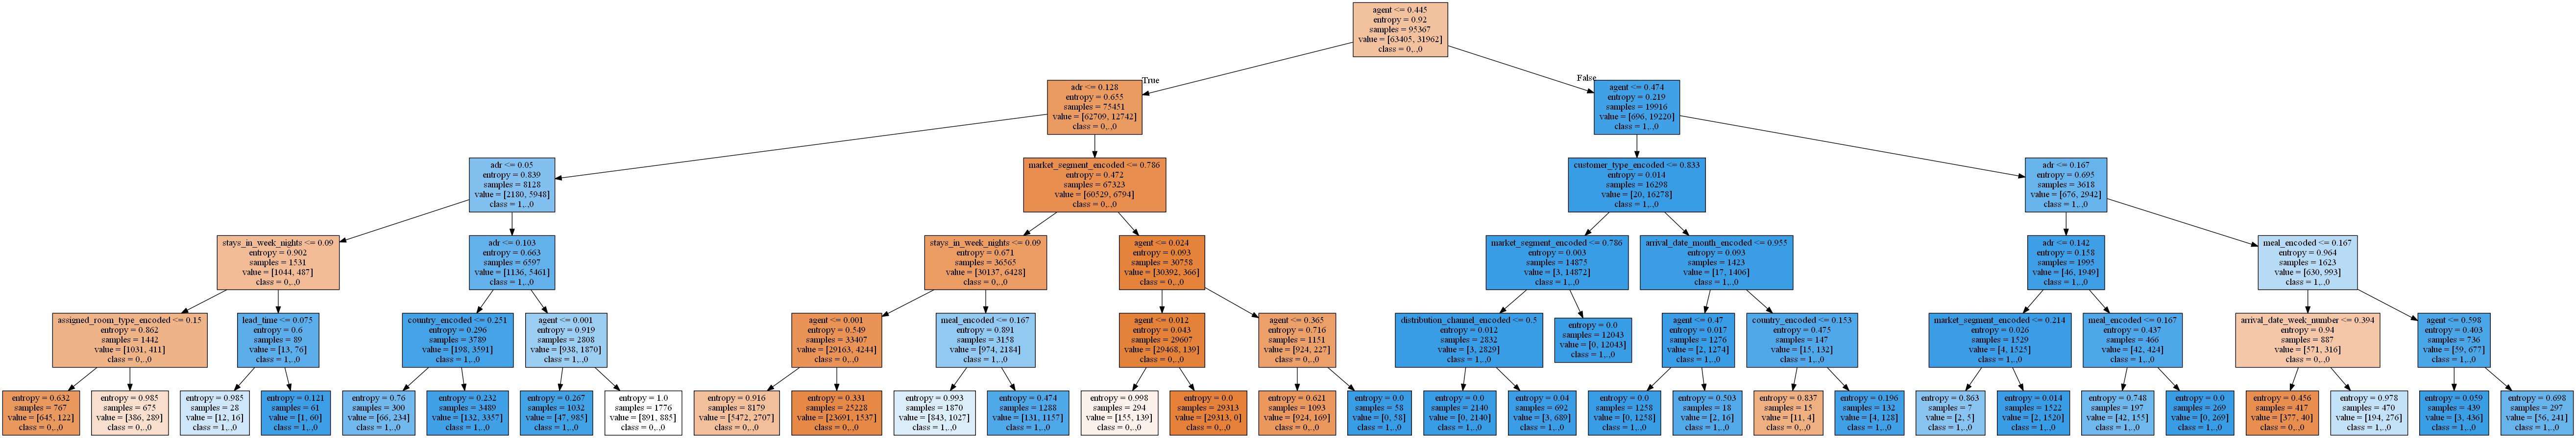

In [52]:
from IPython.display import Image
OUT_PATH='C:\\Users\\Abdul Rashid\\Desktop\\Programming Machine Learning\\'
Image(filename=OUT_PATH + 'tree_gini.png') 

### RMSE for Decision Tree

In [53]:
# RMSE of Decision Tree
dt_rmse_test = np.sqrt(mean_squared_error(target_test, pred_val_dt))
print(f'The RMSE value of Decision Tree is {dt_rmse_test}')

The RMSE value of Decision Tree is 0.2799091491613775


### Confusion Matrix for Decision Tree

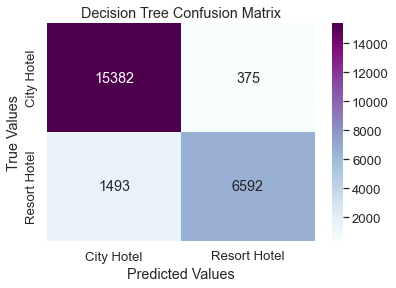

In [54]:
# Confusion Matrix of Decision Tree.
cm_dt = confusion_matrix(target_test, pred_val_dt)

ax= plt.subplot()
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='BuPu', ax = ax); 

ax.set_xlabel('Predicted Values');ax.set_ylabel('True Values'); 
ax.set_title('Decision Tree Confusion Matrix'); 
ax.xaxis.set_ticklabels([ 'City Hotel','Resort Hotel']); 
ax.yaxis.set_ticklabels(['City Hotel','Resort Hotel']);

###  From the above confusion matrix, we can infer that around 1800 observations were predicted wrong, which is a little less when compared to the KNN classifier.

## Multi Nominal bayes
### Using grid search for cross validation.

In [55]:
#  Initializing the Multi Nominal bayes classification.
clf_mnb = MultinomialNB()                                            
alpha =np.linspace( 0.0000001,100,150) # Range (150) of alpha values from 0.0000001 to 100
parameters = {'alpha': alpha , 'fit_prior' : [True, False]} 
#using  grid search as the cross validation technqiue with cv =10
gs_mnb = GridSearchCV(clf_mnb, parameters, verbose=1, cv=10)   

In [56]:
%%time
# fit on train datase
gs_mnb.fit(train, target_train) 

Fitting 10 folds for each of 300 candidates, totalling 3000 fits
Wall time: 3min 28s


GridSearchCV(cv=10, estimator=MultinomialNB(),
             param_grid={'alpha': array([1.00000000e-07, 6.71141039e-01, 1.34228198e+00, 2.01342292e+00,
       2.68456386e+00, 3.35570479e+00, 4.02684573e+00, 4.69798667e+00,
       5.36912761e+00, 6.04026855e+00, 6.71140949e+00, 7.38255043e+00,
       8.05369137e+00, 8.72483231e+00, 9.39597324e+00, 1.00671142e+01,
       1.07382551e+01, 1.14093961e+01, 1.208053...
       8.59060403e+01, 8.65771812e+01, 8.72483222e+01, 8.79194631e+01,
       8.85906040e+01, 8.92617450e+01, 8.99328859e+01, 9.06040269e+01,
       9.12751678e+01, 9.19463087e+01, 9.26174497e+01, 9.32885906e+01,
       9.39597315e+01, 9.46308725e+01, 9.53020134e+01, 9.59731544e+01,
       9.66442953e+01, 9.73154362e+01, 9.79865772e+01, 9.86577181e+01,
       9.93288591e+01, 1.00000000e+02]),
                         'fit_prior': [True, False]},
             verbose=1)

In [57]:
# Best values and score.
best_alpha=gs_mnb.best_params_['alpha']
print(f'The best alpha value for Multi Nominal Bayes is {best_alpha} and the best score is {gs_mnb.best_score_}')

The best alpha value for Multi Nominal Bayes is 1e-07 and the best score is 0.7911960901747556


### Using the best parameters on the test dataset.

In [58]:
%%time
clf_mnb = MultinomialNB(alpha=gs_mnb.best_params_['alpha'], fit_prior=gs_mnb.best_params_['fit_prior'])  
clf_mnb.fit(train, target_train)                 
pred_mnb = clf_mnb.predict(test)          
print("Classification Report\n")
print(classification_report(target_test, pred_mnb))

Classification Report

              precision    recall  f1-score   support

         0.0       0.77      0.97      0.86     15757
         1.0       0.89      0.43      0.58      8085

    accuracy                           0.79     23842
   macro avg       0.83      0.70      0.72     23842
weighted avg       0.81      0.79      0.77     23842

Wall time: 150 ms


### For the multi nominal bias, we can infer that the accuracy score is very less when compared to all the classification models. We have an accuracy of 79 percentage.

### RMSE of Multi Nominal Bayes

In [59]:
mnb_rmse_test = np.sqrt(mean_squared_error(target_test, pred_mnb))
print(f'The RMSE value of Multi Nominal bayes is is {mnb_rmse_test}')

The RMSE value of Multi Nominal bayes is is 0.45744133993506436


### Confusion Matrix for Multi Nominal Bayes

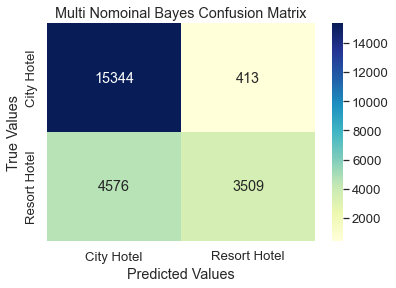

In [60]:
cm_mnb = confusion_matrix(target_test, pred_mnb)

ax= plt.subplot()
sns.heatmap(cm_mnb, annot=True, fmt='d', cmap='YlGnBu', ax = ax); 

ax.set_xlabel('Predicted Values');ax.set_ylabel('True Values'); 
ax.set_title('Multi Nomoinal Bayes Confusion Matrix'); 
ax.xaxis.set_ticklabels([ 'City Hotel','Resort Hotel']); 
ax.yaxis.set_ticklabels(['City Hotel','Resort Hotel']);

### For the confusion matrix for the multi nominal bayes, we can also see that around 5000 of the observations were labeled incorrectly. 

## SVM
### Performing Gridsearch as the cross validation technique using gamma, C and kernel parameters respectively.

In [61]:
#Initializing the SVM classification
clf_svm = SVC(class_weight='balanced')                  

parameters = {'gamma': [0,0.1,0.5,1, 10, 100], 'C': [1,10,30,20, 40,100], 'kernel': ['rbf']}
#using  grid search as the cross validation technqiue with cv =5
gs_svm = GridSearchCV(clf_svm, parameters, verbose=1, cv=5)

In [62]:
# Sampling the data sets
hotel_bk_encoded_norm_sample = hotel_bk_encoded_norm.sample(frac =.20)    
target_sample = hotel_bk_encoded_norm_sample['hotel_encoded']               
independent_sample = hotel_bk_encoded_norm_sample.iloc[:, 1:] 

In [63]:
# splitting the test and target dataset.
train_s, test_s, target_train_s, target_test_s = train_test_split(independent_sample, target_sample, test_size=0.2, random_state=53)

In [64]:
%%time
# fit on train dataset
gs_svm.fit(train_s, target_train_s)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Wall time: 1h 56min 58s


GridSearchCV(cv=5, estimator=SVC(class_weight='balanced'),
             param_grid={'C': [1, 10, 30, 20, 40, 100],
                         'gamma': [0, 0.1, 0.5, 1, 10, 100],
                         'kernel': ['rbf']},
             verbose=1)

In [65]:
gs_svm.best_params_.items()

dict_items([('C', 100), ('gamma', 0.5), ('kernel', 'rbf')])

In [66]:
best_gamma=gs_svm.best_params_['gamma']
best_c=gs_svm.best_params_['C']
best_kernel=gs_svm.best_params_['kernel']

print(f'The best gamma, C and kernel are respectively {best_gamma},{best_c},{best_kernel}')


The best gamma, C and kernel are respectively 0.5,100,rbf


In [67]:
print(f'The best score is {gs_svm.best_score_}')

The best score is 0.9588947253032731


### Using the best parameters to perform on test dataset.

In [68]:
clf_svm = SVC(kernel=gs_svm.best_params_['kernel'], gamma =gs_svm.best_params_['gamma'], C=gs_svm.best_params_['C'], class_weight='balanced') 

clf_svm.fit(train_s, target_train_s)                 
predicted_svm = clf_svm.predict(test_s)           
print("Classification Report\n")
print(classification_report(target_test_s, predicted_svm))

Classification Report

              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97      3165
         1.0       0.93      0.96      0.95      1604

    accuracy                           0.96      4769
   macro avg       0.96      0.96      0.96      4769
weighted avg       0.96      0.96      0.96      4769



###  For the SVM we can see and accuracy of 96 percentage which infers that most of the hotels were predicted accurately about 96 percentage

### RMSE value of SVM

In [69]:
svm_rmse_test = np.sqrt(mean_squared_error(target_test_s, predicted_svm))
print(f'The RMSE value of SVM is {svm_rmse_test}')

The RMSE value of SVM is 0.19101213679177922


### Confusion matrix of SVM

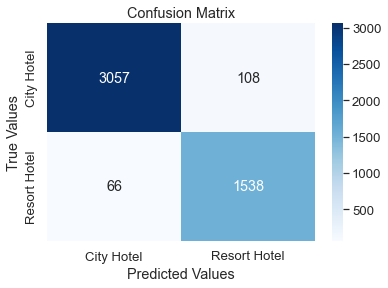

In [70]:
cm_svm = confusion_matrix(target_test_s, predicted_svm)

ax= plt.subplot()
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', ax = ax); 

ax.set_xlabel('Predicted Values');ax.set_ylabel('True Values'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels([ 'City Hotel','Resort Hotel']); 
ax.yaxis.set_ticklabels(['City Hotel','Resort Hotel']);

###  From the confusion matrix, we can infer that around 150 observations were labeled incorrectly, and we see a least observations among all the classification models, which were labeled incorrectly.

### ROC CURVE

KNeighborsClassifier(n_neighbors=7)
DecisionTreeClassifier(criterion='entropy', min_samples_split=10)
MultinomialNB(alpha=1e-07)
SVC(C=100, class_weight='balanced', gamma=0.5, probability=True)


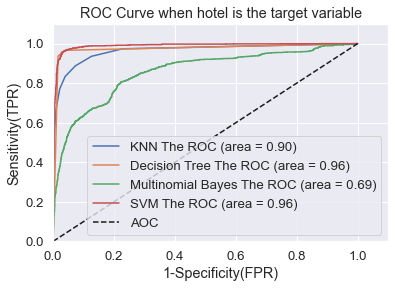

In [71]:
classf_models = [
{
    'classification_label': 'KNN',
    'classification_model': neighbors.KNeighborsClassifier(n_neighbors=gs_knn.best_params_['n_neighbors']),
},
{
    'classification_label': 'Decision Tree',
    'classification_model':tree.DecisionTreeClassifier(criterion=gs_dt.best_params_['criterion'], min_samples_split=gs_dt.best_params_['min_samples_split']),
},
{
    'classification_label': 'Multinomial Bayes',
    'classification_model':  MultinomialNB(alpha=gs_mnb.best_params_['alpha'], fit_prior=gs_mnb.best_params_['fit_prior']),
},
{
    'classification_label': 'SVM',
    'classification_model': SVC(probability=True,kernel=gs_svm.best_params_['kernel'], gamma =gs_svm.best_params_['gamma'], C=gs_svm.best_params_['C'], class_weight='balanced') ,
}
]

for clf_md in classf_models:
    model = clf_md['classification_model']
    print(model)
    model.fit(train_s, target_train_s)  
    y_pred=model.predict(test_s)  

    false_rate, true_rate, thresholds = metrics.roc_curve(target_test_s, model.predict_proba(test_s)[:,1])

    auc_score = metrics.roc_auc_score(target_test_s, model.predict(test_s))

    plt.plot(false_rate, true_rate, label='%s The ROC (area = %0.2f)' % (clf_md['classification_label'], auc_score))

plt.plot([0, 1], [0, 1],'k--',label='AOC')
plt.xlim([0.0, 1.1])
plt.ylim([0.0, 1.1])
plt.xlabel('1-Specificity(FPR)')
plt.ylabel('Sensitivity(TPR)')
plt.title('ROC Curve when hotel is the target variable')
plt.legend(loc="lower right") 
plt.show()

### The above ROC graph shows us the performance of different models applied with "hotel" as the target variable. KNN, Decision Tree and SVM performed good as they have high AUC, whereas Multinomial Naive Bayes has low AUC. For our dataset we can choose both Decision tree and SVM as they both have an accuracy of 0.96.

### RandomForest

In [72]:
# Initializing the Random Forest classification.
clf_rf = ensemble.RandomForestClassifier()
parameters = {'criterion': ['gini', 'entropy']}
gs_rf = GridSearchCV(clf_rf, parameters, verbose=1, cv=10)

In [73]:
%%time
# fit on train dataset
gs_rf.fit(train, target_train)

Fitting 10 folds for each of 2 candidates, totalling 20 fits
Wall time: 4min 3s


GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy']}, verbose=1)

In [74]:
# Best parameters and score for Random Forest.
best_criteria=gs_rf.best_params_['criterion']
print(f'The best criteria for Random forest is {best_criteria} and the best score is {gs_rf.best_score_}')

The best criteria for Random forest is gini and the best score is 0.9884236654590774


In [75]:
gs_rf.best_score_

0.9884236654590774

In [76]:
gs_rf.criterion = gs_rf.best_params_['criterion']

### Classification Report Random Forest

In [77]:
gs_rf.fit(train, target_train)
pred_rf = gs_rf.predict(test)
print("Classification Report\n")
print(classification_report(target_test, pred_rf))

Fitting 10 folds for each of 2 candidates, totalling 20 fits
Classification Report

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     15757
         1.0       0.99      0.98      0.98      8085

    accuracy                           0.99     23842
   macro avg       0.99      0.99      0.99     23842
weighted avg       0.99      0.99      0.99     23842



### For the random forest, we can see a highest among all the models with an accuracy of 99 percentage, which says that the most of the observations were predicted accurately about 99 percentage between the resort hotel, and the city hotel.

### RMSE Value of Random Forest.

In [78]:
rf_rmse_test = np.sqrt(mean_squared_error(target_test, pred_rf))
print(f'The RMSE value of Random forest is {rf_rmse_test}')

The RMSE value of Random forest is 0.10971590923777105


### Confusion Matrix of Random Forest

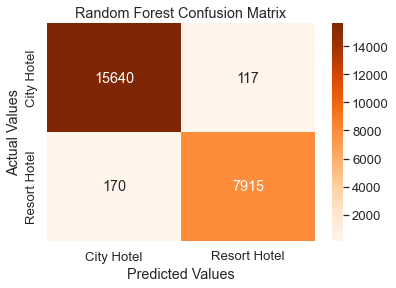

In [79]:
cm_rf= confusion_matrix(target_test, pred_rf)

ax = plt.subplot()
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Oranges', ax=ax); 

ax.set_xlabel('Predicted Values');ax.set_ylabel('Actual Values'); 
ax.set_title('Random Forest Confusion Matrix'); 
ax.xaxis.set_ticklabels([ 'City Hotel','Resort Hotel']); 
ax.yaxis.set_ticklabels(['City Hotel','Resort Hotel']);

###  From the above confusion matrix, we can infer that around 300 observations labeled incorrectly as resort and city hotel.

## Stochastic Gradient Descent

In [80]:
%%time
# Initializing the SGD classification.
sgdreg = SGDRegressor()
alpha =np.linspace(0.00001,100,175) # range (175) of alpha values from 0.00001 to 100
params = {'penalty':['l1', 'l2'], 'alpha':alpha}
gs_sgd = GridSearchCV(sgdreg, params, verbose=1, cv=5)

Wall time: 0 ns


In [81]:
%%time
# fit on train dataset
gs_sgd.fit(train, target_train)

Fitting 5 folds for each of 350 candidates, totalling 1750 fits
Wall time: 4min 6s


GridSearchCV(cv=5, estimator=SGDRegressor(),
             param_grid={'alpha': array([1.00000000e-05, 5.74722586e-01, 1.14943517e+00, 1.72414776e+00,
       2.29886034e+00, 2.87357293e+00, 3.44828552e+00, 4.02299810e+00,
       4.59771069e+00, 5.17242328e+00, 5.74713586e+00, 6.32184845e+00,
       6.89656103e+00, 7.47127362e+00, 8.04598621e+00, 8.62069879e+00,
       9.19541138e+00, 9.77012397e+00, 1.03448366...
       8.73563231e+01, 8.79310357e+01, 8.85057483e+01, 8.90804609e+01,
       8.96551734e+01, 9.02298860e+01, 9.08045986e+01, 9.13793112e+01,
       9.19540238e+01, 9.25287364e+01, 9.31034490e+01, 9.36781616e+01,
       9.42528741e+01, 9.48275867e+01, 9.54022993e+01, 9.59770119e+01,
       9.65517245e+01, 9.71264371e+01, 9.77011497e+01, 9.82758622e+01,
       9.88505748e+01, 9.94252874e+01, 1.00000000e+02]),
                         'penalty': ['l1', 'l2']},
             verbose=1)

In [82]:
# best parameter and score
gs_sgd.best_params_ , gs_sgd.best_score_

({'alpha': 1e-05, 'penalty': 'l1'}, 0.5556918249849769)

In [83]:
penalty=gs_sgd.best_params_ ['penalty']
alpha=gs_sgd.best_params_ ['alpha']
print(f'The best parameter for alpha is {alpha} and the best penalty is {penalty} ')

The best parameter for alpha is 1e-05 and the best penalty is l1 


### RMSE and Classification Report for Gradient Descent

In [85]:
warnings.filterwarnings('ignore')
sgdreg = SGDRegressor(penalty=gs_sgd.best_params_ ['penalty'], alpha=gs_sgd.best_params_ ['alpha'])
sgdreg.fit(train_s, target_train_s)

predict_sgd = sgdreg.predict(test_s )

sgd_rmse_test = np.sqrt(mean_squared_error(predict_sgd, target_test_s))

print(f'The RMSE value of SGD Regression is {sgd_rmse_test}\n')
print("Classification Report\n")
print(classification_report(target_test_s, predict_sgd.astype(int)))

The RMSE value of SGD Regression is 0.32198993543889504

Classification Report

              precision    recall  f1-score   support

         0.0       0.69      1.00      0.82      3165
         1.0       0.93      0.12      0.22      1604

    accuracy                           0.70      4769
   macro avg       0.81      0.56      0.52      4769
weighted avg       0.77      0.70      0.61      4769



### Coefficients of SGD.

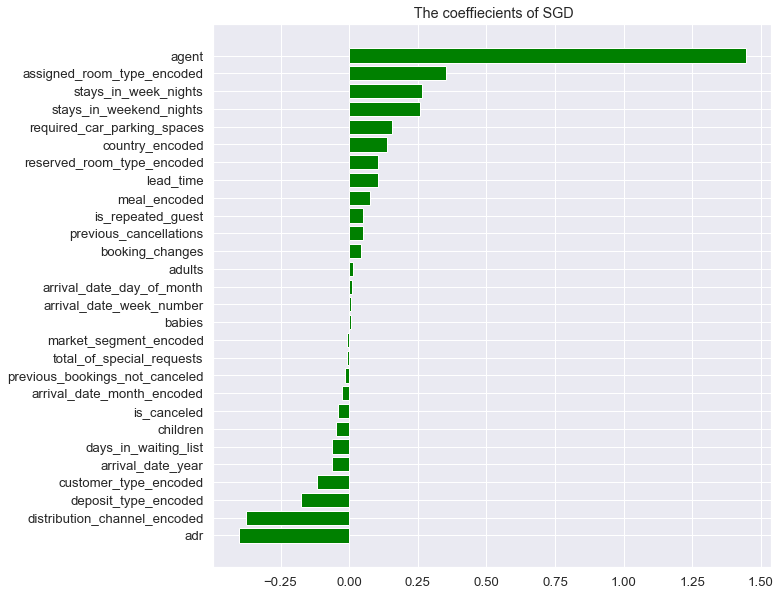

In [86]:
coeffs_sgd = pd.Series(sgdreg.coef_, index=independent_var.columns).sort_values()
fig, ax = plt.subplots(figsize=(10, 10))
plt.barh(coeffs_sgd.index, list(coeffs_sgd) , color='green')
# plt.xticks(rotation=90)
plt.title(' The coeffiecients of SGD')
plt.show()

### Confusion Matrix of SGD

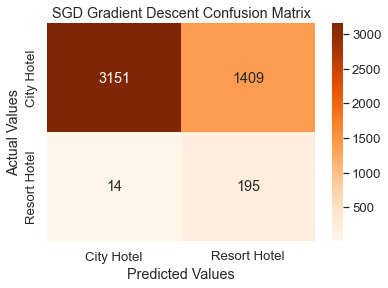

In [87]:
cm_sgd= confusion_matrix(predict_sgd.astype(int), target_test_s)

ax = plt.subplot()
sns.heatmap(cm_sgd, annot=True, fmt='d', cmap='Oranges', ax=ax); 

ax.set_xlabel('Predicted Values');ax.set_ylabel('Actual Values'); 
ax.set_title('SGD Gradient Descent Confusion Matrix'); 
ax.xaxis.set_ticklabels([ 'City Hotel','Resort Hotel']); 
ax.yaxis.set_ticklabels(['City Hotel','Resort Hotel']);

###  From the about SGD classification model we can say that the accuracy is of 70 percentage, which is nearly less when compared to rest of the models, and we see that agent as well as ADR are the most contributed coefficient of SGD.

## NLP Neural Networks

In [88]:
from sklearn.neural_network import MLPClassifier
# Intializing the NLP networks.
mlp = MLPClassifier( hidden_layer_sizes=50,alpha=1e-5,
                                max_iter=500, shuffle=True, random_state=1)


In [89]:
%%time
# fitting the train dataset.
mlp.fit(train, target_train)

Wall time: 1min 19s


MLPClassifier(alpha=1e-05, hidden_layer_sizes=50, max_iter=500, random_state=1)

In [90]:
pred_nlp = mlp.predict(test)

### Confusion Matrix

In [91]:
print(confusion_matrix(target_test,pred_nlp))

[[15522   235]
 [  300  7785]]


### RMSE Value of NLP

In [92]:
nlp_rmse_test = np.sqrt(mean_squared_error(target_test,pred_nlp))
print(f'The RMSE value of NLP is {nlp_rmse_test}')

The RMSE value of NLP is 0.1497978393315481


### Classification Report NLP.

In [93]:
print("Classification Report\n")
print(classification_report(target_test,pred_nlp))

Classification Report

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98     15757
         1.0       0.97      0.96      0.97      8085

    accuracy                           0.98     23842
   macro avg       0.98      0.97      0.97     23842
weighted avg       0.98      0.98      0.98     23842



### Visulaizing the Confusion matrix of NLP

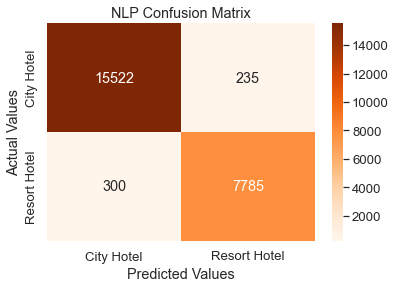

In [94]:
cm_nlp= confusion_matrix(target_test,pred_nlp)

ax = plt.subplot()
sns.heatmap(cm_nlp, annot=True, fmt='d', cmap='Oranges', ax=ax); 

ax.set_xlabel('Predicted Values');ax.set_ylabel('Actual Values'); 
ax.set_title('NLP Confusion Matrix'); 
ax.xaxis.set_ticklabels([ 'City Hotel','Resort Hotel']); 
ax.yaxis.set_ticklabels(['City Hotel','Resort Hotel']);

### We also see the highest score of 98% when we take neural networks is the classification motor with an accuracy of 98 percentage on with the RMSE value of 0.14

## Comparing all the models performed with "hotel" as the target variable in decreasing order of Accuracy.
1.	Random Forest performed best with the Accuracy of 0.99, RMSE value of 0.109 and score of 0.9884.
2.	NLP has the accuracy of 0.98, RMSE value of 0.149 
3.	SVM has the accuracy of 0.96, RMSE value of 0.191 and score of 0.9588.
4.	KNN has the accuracy of 0.95, RMSE value of 0.225 and score of 0.946.
5.	Decision Tree has the accuracy of 0.92, RMSE value of 0.279 and score of 0.980.
6.	Multinomial Naive Bayes has the accuracy of 0.79, RMSE value of 0.457 and score of 0.7911.
7.	Gradient Descent has the accuracy of 0.70, RMSE value of 0.321 and score of 0.5556.


## Classification
### Techniques [KNN, Decision Tree, Multinominal Naive Bayes, SVM, Random Forest, Neural Network and Gradient Descent]
### Using is_cancelled  as the target variable

In [95]:
# We are performing classification using is_cancelled as the target variable
# We have two set of data in our target variable 0 for Not Cancelled and 1 for is cancelled.
is_cancelled_target = hotel_bk_encoded['is_canceled']
independent_var = hotel_bk_encoded_norm.drop(columns=['is_canceled'])


In [96]:
# Splitting the dataset using the hotel as the taget variable into train and test dataset.
train, test, target_train, target_test = train_test_split(independent_var, is_cancelled_target, test_size=0.2, random_state=53)

In [97]:
# checking the train rows and columns.
train.shape

(95367, 28)

In [98]:
# checking the test rows and columns.
test.shape

(23842, 28)

In [99]:
train

hotel_encoded  arrival_date_month_encoded  country_encoded  \
117579            0.0                    0.090909         0.242938   
21446             1.0                    0.272727         0.288136   
3956              1.0                    0.272727         0.762712   
22893             1.0                    0.000000         0.288136   
52126             0.0                    0.727273         0.762712   
...               ...                         ...              ...   
46843             0.0                    0.363636         0.457627   
55717             0.0                    0.090909         0.333333   
35701             1.0                    0.000000         0.163842   
58141             0.0                    0.909091         0.762712   
56857             0.0                    1.000000         0.762712   

        meal_encoded  market_segment_encoded  distribution_channel_encoded  \
117579           0.0                0.714286                          0.75   
21446            0.0                0.857143                          0.75   
3956             0.0                0.714286                          0.75   
22893            1.0                0.571429                          0.75   
52126            0.0                0.285714                          0.75   
...              ...                     ...                           ...   
46843            0.0                0.857143                          0.75   
55717            0.0                0.857143                          0.75   
35701            0.0                0.857143                          0.75   
58141            0.0                0.285714                          0.00   
56857            0.0                0.571429                          0.75   

        reserved_room_type_encoded  deposit_type_encoded  \
117579                         0.0                   0.0   
21446                          0.0                   0.0   
3956                           0.0                   0.0   
22893                          0.0                   0.0   
52126                          0.0                   0.5   
...                            ...                   ...   
46843                          0.0                   0.0   
55717                          0.0                   0.0   
35701                          0.0                   0.0   
58141                          0.5                   0.0   
56857                          0.0                   0.5   

        assigned_room_type_encoded  customer_type_encoded  lead_time  \
117579                         0.0               0.666667   0.238806   
21446                          0.3               0.666667   0.051560   
3956                           0.3               0.666667   0.002714   
22893                          0.0               1.000000   0.108548   
52126                          0.0               0.666667   0.153324   
...                            ...                    ...        ...   
46843                          0.0               0.666667   0.021710   
55717                          0.0               0.666667   0.245590   
35701                          0.0               0.666667   0.004071   
58141                          0.4               0.666667   0.018996   
56857                          0.0               0.666667   0.587517   

        arrival_date_year  arrival_date_week_number  \
117579                1.0                  0.576923   
21446                 0.5                  0.173077   
3956                  0.5                  0.115385   
22893                 0.5                  0.269231   
52126                 0.5                  0.423077   
...                   ...                       ...   
46843                 0.5                  0.057692   
55717                 0.5                  0.634615   
35701                 1.0                  0.307692   
58141                 0.5                  0.769231   
56857                 0.5              

In [100]:
target_train

117760    0
21453     0
3961      0
22900     0
52154     1
         ..
46864     0
55749     1
35713     0
58174     1
56890     1
Name: is_canceled, Length: 95367, dtype: int64

##  KNN
### For cross validation we are using Grid Search with cv=10

In [101]:
#  Initializing the KNN classification.
clf = neighbors.KNeighborsClassifier()
# using k values from 3 to 12.
parameters = {'n_neighbors': [3,4,5,6,7,8,9,10,11,12]}   
# Grid Search Cross validation on train dataset
gs = GridSearchCV(clf, parameters, verbose=1, cv=10) 

In [102]:
%%time
# KNN fit on train dataset
gs.fit(train, target_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Wall time: 25min


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]},
             verbose=1)

In [103]:
# best score.
best_param=gs_knn.best_params_['n_neighbors']
print(f'The best neighbors for KNN is {best_param} and its score is {gs_knn.best_score_}')


The best neighbors for KNN is 7 and its score is 0.9465747828309805


### Classification Report of KNN.

In [104]:
%%time
# classification Report of KNN.
clf = neighbors.KNeighborsClassifier(n_neighbors=3)  

clf.fit(train, target_train)                        
pred_value_KNN = clf.predict(test)                 
print("Classification Report\n")
print(classification_report(target_test, pred_value_KNN))

Classification Report

              precision    recall  f1-score   support

           0       0.86      0.86      0.86     15035
           1       0.77      0.76      0.77      8807

    accuracy                           0.83     23842
   macro avg       0.81      0.81      0.81     23842
weighted avg       0.83      0.83      0.83     23842

Wall time: 32.9 s


### RMSE value of KNN

In [105]:
# Rmse Value
knn_rmse_test = np.sqrt(mean_squared_error(target_test, pred_value_KNN))
print(f'The RMSE value of KNN is {knn_rmse_test}')

The RMSE value of KNN is 0.4153440687086536


### Confusion Matrix of KNN

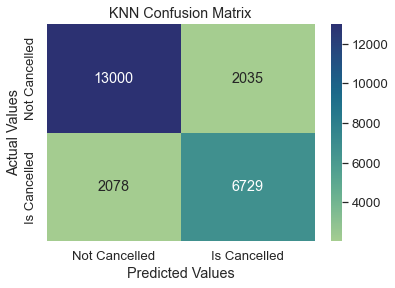

In [106]:
knncm = confusion_matrix(target_test, pred_value_KNN)

ax= plt.subplot()
sns.heatmap(knncm, annot=True, fmt='d', cmap='crest', ax = ax); 

ax.set_xlabel('Predicted Values');ax.set_ylabel('Actual Values'); 
ax.set_title('KNN Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not Cancelled', 'Is Cancelled']);
ax.yaxis.set_ticklabels(['Not Cancelled', 'Is Cancelled']);

### When we consider is canceled as our target variable, and apply our classification model of KNN. We get an accuracy of the 83 percentage, and we also see that the similar number of is canceled and not cancelled observations are labeled incorrectly.

## Decision Tree
### Classification using Decision Tree using gini and entropy and using the min split from 10 to 90.

In [107]:
# Initializing the Decision Tree classification
clf_dt = tree.DecisionTreeClassifier() 
# using both gini and entropy.
parameters = {'criterion': ['gini', 'entropy'], 'min_samples_split': [2,4,8,15,30,50,100]   } 
gs_dt = GridSearchCV(clf_dt, parameters, verbose=1, cv=10)

In [108]:
%%time
# fit on train dataset
gs_dt.fit(train, target_train)

Fitting 10 folds for each of 14 candidates, totalling 140 fits
Wall time: 1min 31s


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': [2, 4, 8, 15, 30, 50, 100]},
             verbose=1)

In [109]:
best_criteria=gs_dt.best_params_['criterion']
min_split=gs_dt.best_params_['min_samples_split']
print(f'The best criteria for Decision Tree is {best_criteria} and the minimum split is {min_split} and the best score is {gs_dt.best_score_} ')

The best criteria for Decision Tree is entropy and the minimum split is 100 and the best score is 0.8589974139487111 


### Classification Report of Decision Tree.

In [110]:
%%time
# classification Report.

clf_dt = tree.DecisionTreeClassifier(criterion=gs_dt.best_params_['criterion'], min_samples_split=gs_dt.best_params_['min_samples_split'], max_depth=5)  

clf_dt.fit(train, target_train)                        

pred_val_dt = clf_dt.predict(test)                 
print("Classification Report\n")
print(classification_report(target_test, pred_val_dt))

Classification Report

              precision    recall  f1-score   support

           0       0.78      0.93      0.85     15035
           1       0.82      0.55      0.66      8807

    accuracy                           0.79     23842
   macro avg       0.80      0.74      0.75     23842
weighted avg       0.79      0.79      0.78     23842

Wall time: 300 ms


### Visualizing the Decision Tree

In [111]:
# Visualizing the decision tree using graphviz.
import graphviz
from sklearn.tree import export_graphviz
from sklearn import tree

fn_df=train.columns
fn_list=fn_df.values.tolist()
class_names_lst=target_train.unique()
class_names_lst=[",".join(item) for item in class_names_lst.astype(str)]
class_names_lst


OUT_PATH = "C:\\Users\\Abdul Rashid\\Desktop\\Programming Machine Learning\\"
tree.export_graphviz(clf_dt,
                     out_file=OUT_PATH + 'tree.dot',
                     feature_names = fn_list, 
                     class_names=class_names_lst,
                     filled = True)



In [112]:
system(dot -Tpng tree.dot -o tree_gini.png)

[]

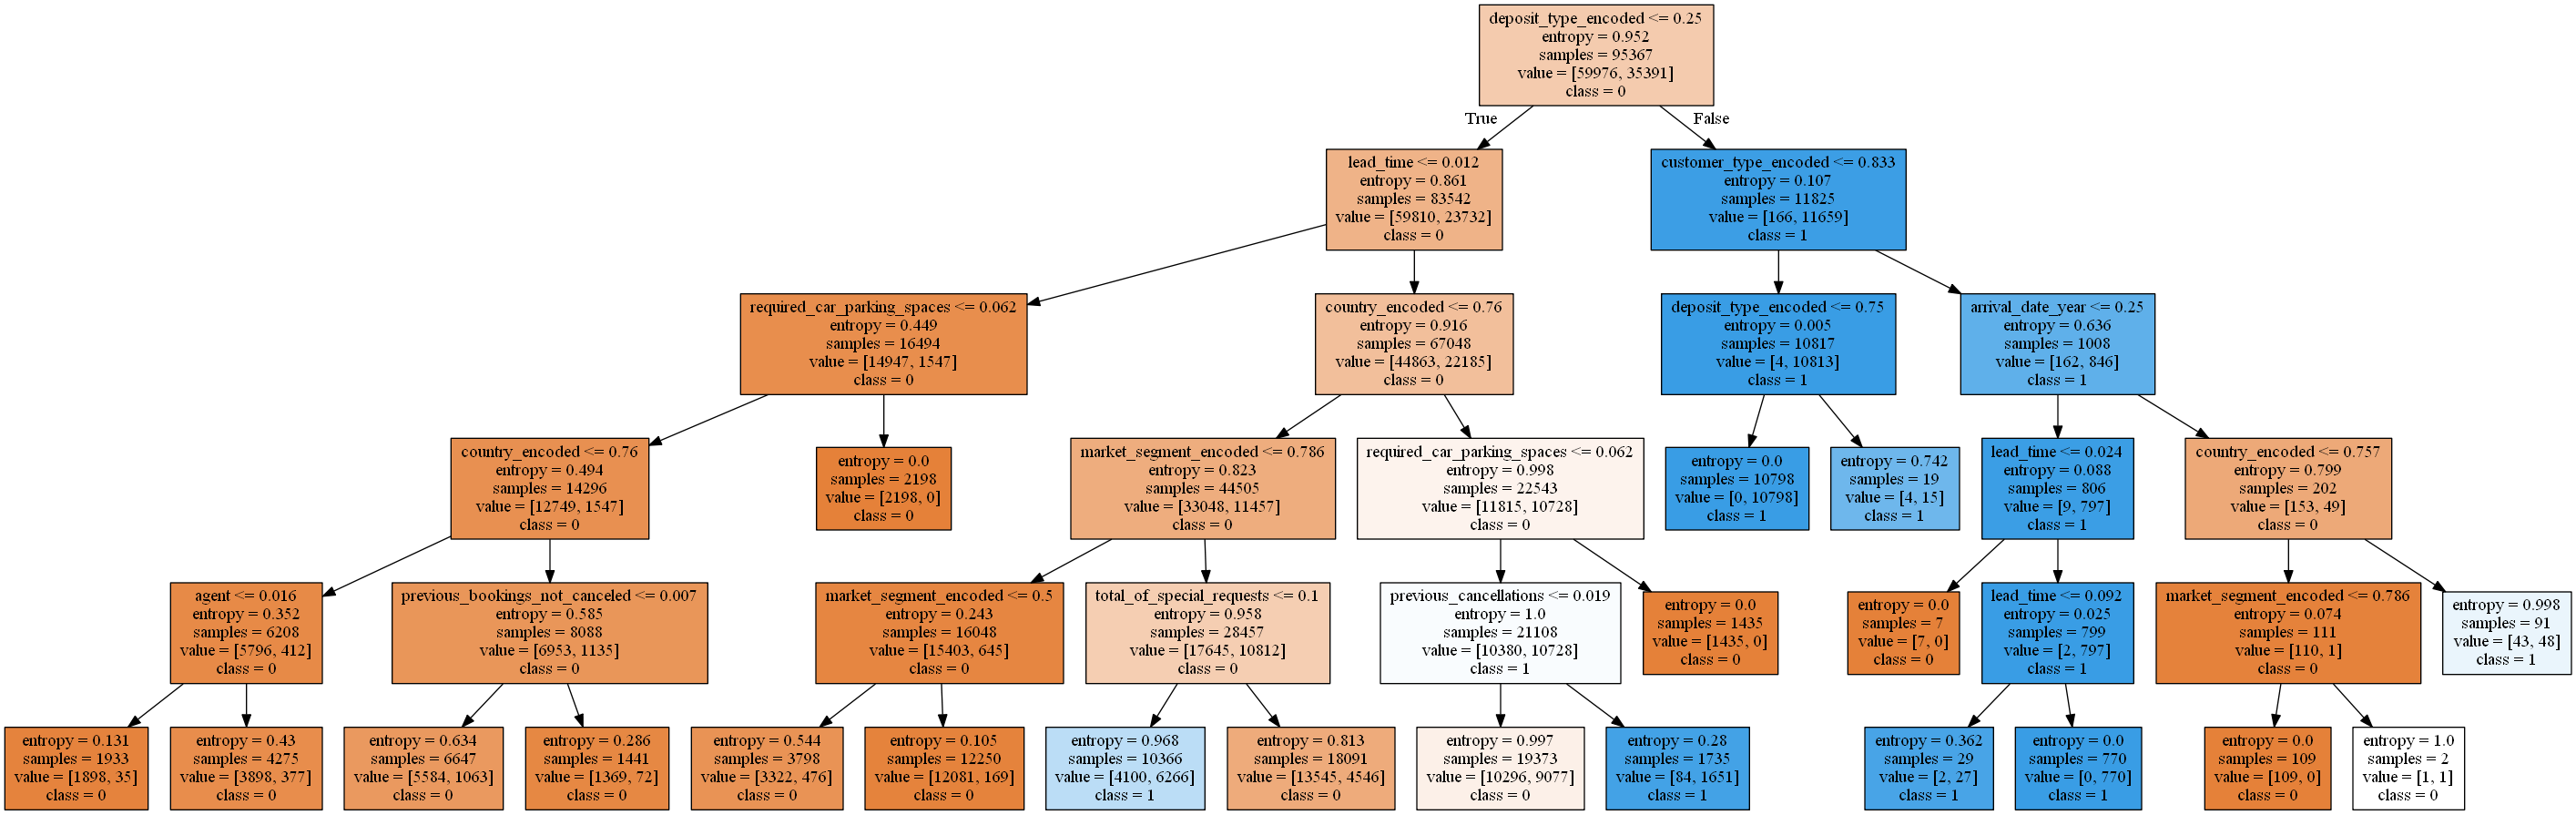

In [113]:
from IPython.display import Image
OUT_PATH='C:\\Users\\Abdul Rashid\\Desktop\\Programming Machine Learning\\'
Image(filename=OUT_PATH + 'tree_gini.png') 

### RMSE Value of Decision Tree

In [114]:
dt_rmse_test = np.sqrt(mean_squared_error(target_test, pred_val_dt))
print(f'The RMSE value of Decision Tree is {dt_rmse_test}')

The RMSE value of Decision Tree is 0.4603660696052526


### Confusion Matrix of Decision Tree

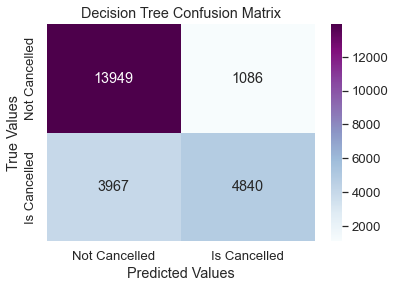

In [115]:
cm_dt = confusion_matrix(target_test, pred_val_dt)

ax= plt.subplot()
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='BuPu', ax = ax); 

ax.set_xlabel('Predicted Values');ax.set_ylabel('True Values'); 
ax.set_title('Decision Tree Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not Cancelled', 'Is Cancelled']);
ax.yaxis.set_ticklabels(['Not Cancelled', 'Is Cancelled']);

### We see an accuracy of 79 percentage for the decision tree, which is a little bit less when compared to our previous model KNN we have also visualized the tree with a depth of 5, and we also infer that around 5000 observations well label incorrectly for is canceled and not canceled

## Multi Nominal bayes
### Using grid search for cross validation.

In [116]:
# Initializing the Multi Nominal bayes classification
clf_mnb = MultinomialNB()                                            
parameters = {'alpha': [0.000000001,0.0000001,0.00001, 0.0001, 0.001, 0.005, 0.1, 1, 10, 100]  , 'fit_prior' : [True, False]}     
gs_mnb = GridSearchCV(clf_mnb, parameters, verbose=1, cv=10)   

In [117]:
%%time
# fit on train dataset
gs_mnb.fit(train, target_train) 

Fitting 10 folds for each of 20 candidates, totalling 200 fits
Wall time: 6.17 s


GridSearchCV(cv=10, estimator=MultinomialNB(),
             param_grid={'alpha': [1e-09, 1e-07, 1e-05, 0.0001, 0.001, 0.005,
                                   0.1, 1, 10, 100],
                         'fit_prior': [True, False]},
             verbose=1)

In [118]:

best_alpha=gs_mnb.best_params_['alpha']
print(f'The best alpha value for Multi Nominal Bayes is {best_alpha} and the best score is {gs_mnb.best_score_}')



The best alpha value for Multi Nominal Bayes is 1e-09 and the best score is 0.7536045071807929


### Classification Report of Multi Nominal bayes

In [119]:
%%time


clf_mnb =  MultinomialNB(alpha=gs_mnb.best_params_['alpha'], fit_prior=gs_mnb.best_params_['fit_prior'])   
clf_mnb.fit(train, target_train)                 
pred_mnb = clf_mnb.predict(test)          
print("Classification Report\n")
print(classification_report(target_test, pred_mnb))

Classification Report

              precision    recall  f1-score   support

           0       0.72      0.99      0.84     15035
           1       0.97      0.34      0.50      8807

    accuracy                           0.75     23842
   macro avg       0.85      0.67      0.67     23842
weighted avg       0.81      0.75      0.71     23842

Wall time: 51 ms


### RMSE of Multi Nominal bayes

In [120]:
mnb_rmse_test = np.sqrt(mean_squared_error(target_test, pred_mnb))
print(f'The RMSE value of Multi Nominal bayes is is {mnb_rmse_test}')

The RMSE value of Multi Nominal bayes is is 0.49745598921202994


### Confusion Matrix of Multi Nominal bayes

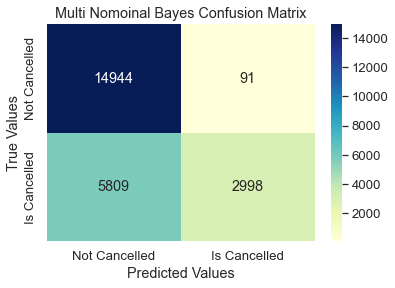

In [121]:
cm_mnb = confusion_matrix(target_test, pred_mnb)

ax= plt.subplot()
sns.heatmap(cm_mnb, annot=True, fmt='d', cmap='YlGnBu', ax = ax); 

ax.set_xlabel('Predicted Values');ax.set_ylabel('True Values'); 
ax.set_title('Multi Nomoinal Bayes Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not Cancelled', 'Is Cancelled']);
ax.yaxis.set_ticklabels(['Not Cancelled', 'Is Cancelled']);

### For multi nominal bayes, we also see a least accuracy when compared to the rest of the models of 75 percentage, and we see a highest amount 6000 of the observations which were labeled incorrectly.

## SVM
### Using grid search for cross validation.

In [122]:
# Initializing the SVM classification.
clf_svm = SVC(class_weight='balanced')                  

parameters = {'gamma': [0,0.1,0.5,1, 10, 100], 'C': [1,10,30,20, 40,100], 'kernel': ['rbf']}

gs_svm = GridSearchCV(clf_svm, parameters, verbose=1, cv=5)

In [123]:
hotel_bk_encoded_norm_sample = hotel_bk_encoded_norm.sample(frac =.20)    
target_sample = hotel_bk_encoded_norm_sample['is_canceled']               
independent_sample = hotel_bk_encoded_norm_sample.drop(columns=['is_canceled'])
train_s, test_s, target_train_s, target_test_s = train_test_split(independent_sample, target_sample, test_size=0.2, random_state=53)

In [124]:
%%time
# fitting the train dataset.
gs_svm.fit(train_s, target_train_s)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Wall time: 1h 5min 29s


GridSearchCV(cv=5, estimator=SVC(class_weight='balanced'),
             param_grid={'C': [1, 10, 30, 20, 40, 100],
                         'gamma': [0, 0.1, 0.5, 1, 10, 100],
                         'kernel': ['rbf']},
             verbose=1)

In [125]:
# best parameters.
best_gamma=gs_svm.best_params_['gamma']
best_c=gs_svm.best_params_['C']
best_kernel=gs_svm.best_params_['kernel']

print(f'The best gamma, C and kernel are respectively {best_gamma},{best_c},{best_kernel}')


The best gamma, C and kernel are respectively 0.5,40,rbf


In [126]:

print(f'The best score is {gs_svm.best_score_}')

The best score is 0.8285007089147316


### Classification Matrix of SVM

In [127]:
clf_svm = SVC(kernel=gs_svm.best_params_['kernel'], gamma =gs_svm.best_params_['gamma'], C=gs_svm.best_params_['C'], class_weight='balanced') 

clf_svm.fit(train_s, target_train_s)                   

predicted_svm = clf_svm.predict(test_s)          
print("Classification Report\n")
print(classification_report(target_test_s, predicted_svm))

Classification Report

              precision    recall  f1-score   support

         0.0       0.88      0.82      0.85      2989
         1.0       0.73      0.82      0.77      1780

    accuracy                           0.82      4769
   macro avg       0.81      0.82      0.81      4769
weighted avg       0.82      0.82      0.82      4769



### RMSE of SVM

In [128]:
svm_rmse_test = np.sqrt(mean_squared_error(target_test_s, predicted_svm))
print(f'The RMSE value of SVM is {svm_rmse_test}')

The RMSE value of SVM is 0.42687058278040135


### Confusion Matrix of SVM

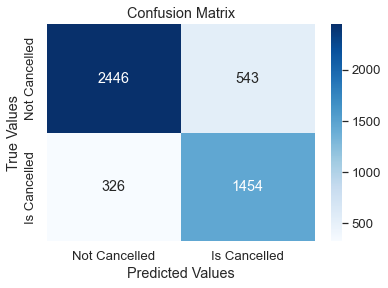

In [129]:
cm_svm = confusion_matrix(target_test_s, predicted_svm)

ax= plt.subplot()
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', ax = ax); 

ax.set_xlabel('Predicted Values');ax.set_ylabel('True Values'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not Cancelled', 'Is Cancelled']);
ax.yaxis.set_ticklabels(['Not Cancelled', 'Is Cancelled']);

### For the SVM when we consider, it’s canceled as our target variable, we see an accuracy of 82 percentage, and we see a least amount of observations which were labeled incorrectly of thousand records.

### AOC Curve

KNeighborsClassifier(n_neighbors=7)
DecisionTreeClassifier(criterion='entropy', min_samples_split=100)
MultinomialNB(alpha=1e-09)
SVC(C=40, class_weight='balanced', gamma=0.5, probability=True)


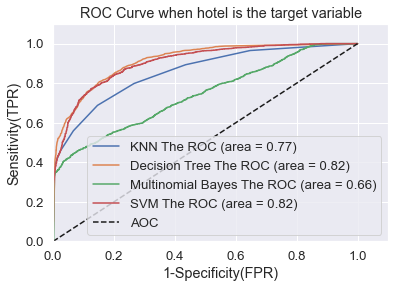

In [130]:
classf_models = [
{
    'classification_label': 'KNN',
    'classification_model': neighbors.KNeighborsClassifier(n_neighbors=gs_knn.best_params_['n_neighbors']),
},
{
    'classification_label': 'Decision Tree',
    'classification_model':tree.DecisionTreeClassifier(criterion=gs_dt.best_params_['criterion'], min_samples_split=gs_dt.best_params_['min_samples_split']),
},
{
    'classification_label': 'Multinomial Bayes',
    'classification_model':  MultinomialNB(alpha=gs_mnb.best_params_['alpha'], fit_prior=gs_mnb.best_params_['fit_prior']),
},
{
    'classification_label': 'SVM',
    'classification_model': SVC(probability=True,kernel=gs_svm.best_params_['kernel'], gamma =gs_svm.best_params_['gamma'], C=gs_svm.best_params_['C'], class_weight='balanced') ,
}
]

for clf_md in classf_models:
    model = clf_md['classification_model']
    print(model)
    model.fit(train_s, target_train_s)  
    y_pred=model.predict(test_s)  

    false_rate, true_rate, thresholds = metrics.roc_curve(target_test_s, model.predict_proba(test_s)[:,1])

    auc_score = metrics.roc_auc_score(target_test_s, model.predict(test_s))

    plt.plot(false_rate, true_rate, label='%s The ROC (area = %0.2f)' % (clf_md['classification_label'], auc_score))

plt.plot([0, 1], [0, 1],'k--',label='AOC')
plt.xlim([0.0, 1.1])
plt.ylim([0.0, 1.1])
plt.xlabel('1-Specificity(FPR)')
plt.ylabel('Sensitivity(TPR)')
plt.title('ROC Curve when hotel is the target variable')
plt.legend(loc="lower right") 
plt.show()

### The above ROC graph shows us the performance of different models applied with "is_cancelled" as the target variable. Decision Tree and SVM performed good as they have high AUC, whereas KNN and  Multinomial Naive Bayes has low AUC. For our dataset we can choose both SVM and Decision tree as they both have an accuracy of 0.82 respectively.

## Random Forest

In [131]:
# Initializing the Random Forest classification.
clf_rf = ensemble.RandomForestClassifier()
parameters = {'criterion': ['gini', 'entropy']}
gs_rf = GridSearchCV(clf_rf, parameters, verbose=1, cv=10)

In [132]:
%%time
# fitting the train dataset.
gs_rf.fit(train, target_train)

Fitting 10 folds for each of 2 candidates, totalling 20 fits
Wall time: 3min 49s


GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy']}, verbose=1)

In [133]:
# best values.
best_criteria=gs_rf.best_params_['criterion']
print(f'The best criteria for Random forest is {best_criteria} and the best score is {gs_rf.best_score_}')

The best criteria for Random forest is entropy and the best score is 0.8942821621793747


In [134]:
gs_rf.criterion = gs_rf.best_params_['criterion']

### Classification Report of Random Forest

In [135]:
gs_rf.fit(train, target_train)
pred_rf = gs_rf.predict(test)
print("Classification Report\n")
print(classification_report(target_test, pred_rf))

Fitting 10 folds for each of 2 candidates, totalling 20 fits
Classification Report

              precision    recall  f1-score   support

           0       0.90      0.94      0.92     15035
           1       0.88      0.82      0.85      8807

    accuracy                           0.90     23842
   macro avg       0.89      0.88      0.89     23842
weighted avg       0.89      0.90      0.89     23842



### RMSE of Random Forest

In [136]:
rf_rmse_test = np.sqrt(mean_squared_error(target_test, pred_rf))
print(f'The RMSE value of Random forest is {rf_rmse_test}')

The RMSE value of Random forest is 0.3238810242604792


### Confusion Matrix of Random Forest

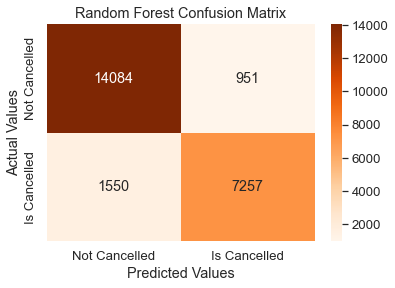

In [137]:
cm_rf= confusion_matrix(target_test, pred_rf)

ax = plt.subplot()
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Oranges', ax=ax); 

ax.set_xlabel('Predicted Values');ax.set_ylabel('Actual Values'); 
ax.set_title('Random Forest Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not Cancelled', 'Is Cancelled']);
ax.yaxis.set_ticklabels(['Not Cancelled', 'Is Cancelled']);

###  The best model which has perform accurately when we consider is canceled as the target variable and for the random forest we achieved with an highest accuracy of 90 percentage and  from the confusion matrix we see around 2500 of observations were labeled incorrectly, and most of labels were what product it has is canceled when compared to not canceled and this is an improvement when compared to the rest of the classification models

## Stochastic Gradient Descent

In [138]:
%%time
# Initializing the SGD classification.
sgdreg = SGDRegressor()
alpha =np.linspace( 0.0001,10,250)
params = {'penalty':['l1', 'l2'], 'alpha':alpha}
gs_sgd = GridSearchCV(sgdreg, params, verbose=1, cv=5)

Wall time: 0 ns


In [139]:
%%time
# fitting on the train dataset.
gs_sgd.fit(train, target_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
Wall time: 5min 54s


GridSearchCV(cv=5, estimator=SGDRegressor(),
             param_grid={'alpha': array([1.00000000e-04, 4.02602410e-02, 8.04204819e-02, 1.20580723e-01,
       1.60740964e-01, 2.00901205e-01, 2.41061446e-01, 2.81221687e-01,
       3.21381928e-01, 3.61542169e-01, 4.01702410e-01, 4.41862651e-01,
       4.82022892e-01, 5.22183133e-01, 5.62343373e-01, 6.02503614e-01,
       6.42663855e-01, 6.82824096e-01, 7.22984337...
       9.15663494e+00, 9.19679518e+00, 9.23695542e+00, 9.27711566e+00,
       9.31727590e+00, 9.35743614e+00, 9.39759639e+00, 9.43775663e+00,
       9.47791687e+00, 9.51807711e+00, 9.55823735e+00, 9.59839759e+00,
       9.63855783e+00, 9.67871807e+00, 9.71887831e+00, 9.75903855e+00,
       9.79919880e+00, 9.83935904e+00, 9.87951928e+00, 9.91967952e+00,
       9.95983976e+00, 1.00000000e+01]),
                         'penalty': ['l1', 'l2']},
             verbose=1)

In [140]:
# best parameters.
gs_sgd.best_params_ , gs_sgd.best_score_

({'alpha': 0.0001, 'penalty': 'l2'}, 0.34249430407377224)

In [141]:
penalty=gs_sgd.best_params_ ['penalty']
alpha=gs_sgd.best_params_ ['alpha']
print(f'The best parameter for alpha is {alpha} and the best penalty is {penalty} ')

The best parameter for alpha is 0.0001 and the best penalty is l2 


In [142]:
sgdreg = SGDRegressor(penalty=gs_sgd.best_params_ ['penalty'], alpha=gs_sgd.best_params_ ['alpha'])
sgdreg.fit(train, target_train)
predict_sgd = sgdreg.predict(test )
sgd_rmse_test = np.sqrt(mean_squared_error(predict_sgd, target_test))
print("Classification Report\n")
print(classification_report(target_test, predict_sgd.astype(int)))

Classification Report

              precision    recall  f1-score   support

           0       0.66      1.00      0.79     15035
           1       0.98      0.12      0.22      8807

    accuracy                           0.68     23842
   macro avg       0.82      0.56      0.51     23842
weighted avg       0.78      0.68      0.58     23842



### RMSE value of SGD Regression

In [143]:
print(f'The RMSE value of SGD Regression is {sgd_rmse_test}')

The RMSE value of SGD Regression is 0.3930533026695814


In [144]:
coeffs_sgd = pd.Series(sgdreg.coef_, index=hotel_bk_encoded.drop(columns=['is_canceled']).columns).sort_values()

In [145]:
coeffs_sgd

total_of_special_requests        -0.508418
assigned_room_type_encoded       -0.468820
required_car_parking_spaces      -0.459322
booking_changes                  -0.313689
customer_type_encoded            -0.105602
days_in_waiting_list             -0.080499
distribution_channel_encoded     -0.049714
hotel_encoded                    -0.048037
arrival_date_month_encoded       -0.036016
is_repeated_guest                -0.030672
previous_bookings_not_canceled   -0.025611
arrival_date_day_of_month        -0.010944
babies                           -0.005998
meal_encoded                     -0.001807
agent                             0.016429
arrival_date_week_number          0.020152
adults                            0.051620
arrival_date_year                 0.055812
children                          0.128986
stays_in_weekend_nights           0.141032
stays_in_week_nights              0.151397
previous_cancellations            0.218757
adr                               0.302091
country_enc

In [146]:
sgdreg.coef_

array([-0.04803705, -0.03601649,  0.36240298, -0.00180747,  0.46297397,
       -0.04971373,  0.37193079,  0.95952841, -0.46881996, -0.10560207,
        0.41284359,  0.05581243,  0.02015184, -0.01094364,  0.14103196,
        0.15139662,  0.05161964,  0.12898553, -0.00599778, -0.03067199,
        0.21875682, -0.02561069, -0.3136895 ,  0.0164288 , -0.08049867,
        0.30209084, -0.45932229, -0.50841767])

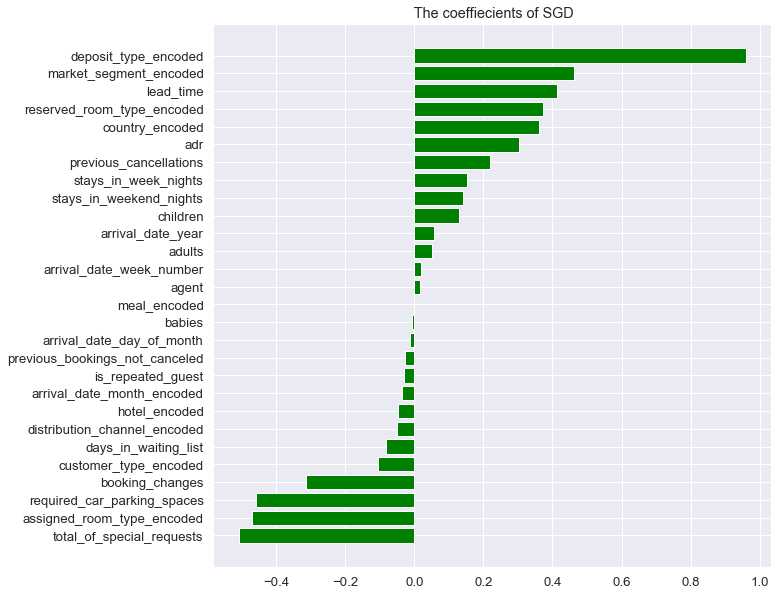

In [147]:
# Plotting coeffecients of SGD.
fig, ax = plt.subplots(figsize=(10, 10))
plt.barh(coeffs_sgd.index, list(coeffs_sgd) , color='green')

plt.title(' The coeffiecients of SGD')
plt.show()

###  Confusion Matrix

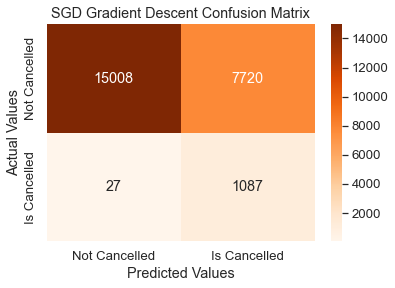

In [148]:
cm_sgd= confusion_matrix(predict_sgd.astype(int), target_test)

ax = plt.subplot()
sns.heatmap(cm_sgd, annot=True, fmt='d', cmap='Oranges', ax=ax); 

ax.set_xlabel('Predicted Values');ax.set_ylabel('Actual Values'); 
ax.set_title('SGD Gradient Descent Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not Cancelled', 'Is Cancelled']);
ax.yaxis.set_ticklabels(['Not Cancelled', 'Is Cancelled']);

### For the gradient descent we see a least accuracy of 68 percentage, and we also see the contributing coefficient of SGD which are deposit type and total of special request

# Neural Network

In [149]:
# Initializing the Neural Network classification.
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(15,),max_iter=500)


In [150]:
# fit on train dataset
mlp.fit(train, target_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(15,), max_iter=500,
              solver='lbfgs')

In [151]:
pred_nlp = mlp.predict(test)

### Confusion Matrix of Neural Network.

In [152]:
print(confusion_matrix(target_test,pred_nlp))

[[13657  1378]
 [ 2916  5891]]


### RMSE value of NLP

In [153]:
nlp_rmse_test = np.sqrt(mean_squared_error(target_test,pred_nlp))
print(f'The RMSE value of NLP is {nlp_rmse_test}')

The RMSE value of NLP is 0.4243846609005607


### Classification Report of NLP

In [154]:
print("Classification Report\n")
print(classification_report(target_test,pred_nlp))

Classification Report

              precision    recall  f1-score   support

           0       0.82      0.91      0.86     15035
           1       0.81      0.67      0.73      8807

    accuracy                           0.82     23842
   macro avg       0.82      0.79      0.80     23842
weighted avg       0.82      0.82      0.82     23842



### Confusion Matrix of NLP

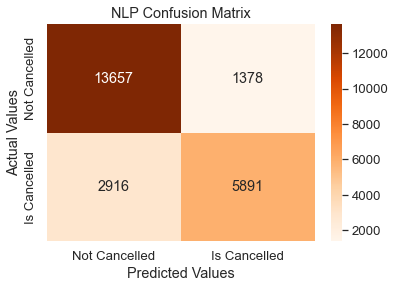

In [155]:
cm_nlp= confusion_matrix(target_test,pred_nlp)

ax = plt.subplot()
sns.heatmap(cm_nlp, annot=True, fmt='d', cmap='Oranges', ax=ax); 

ax.set_xlabel('Predicted Values');ax.set_ylabel('Actual Values'); 
ax.set_title('NLP Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not Cancelled', 'Is Cancelled']);
ax.yaxis.set_ticklabels(['Not Cancelled', 'Is Cancelled']);

### When we run neural network on our data set and considering is cancelled  as our target variable, we achieved an accuracy of 83 percentage, which infers that the model was able to predict 82 percentage of is canceled and not canceled records from the data set

## Comparing all the models performed with "is_cancelled" as the target variable:
1.	Random Forest performed best with the Accuracy of 0.90, RMSE value of 0.32 and score of 0.894.
2.  KNN has the accuracy of 0.83, RMSE value of 0.415 and score of 0.946.
3.	NLP has the accuracy of 0.82, RMSE value of 0.424.
4.  SVM has the accuracy of 0.82, RMSE value of 0.426 and score of 0.828.	
5.	Decision Tree has the accuracy of 0.79, RMSE value of 0.460 and score of 0.8589.
6.	Multinomial Naive Bayes has the accuracy of 0.75, RMSE value of 0.497 and score of 0.753.
7.	Gradient Descent has the accuracy of 0.68, RMSE value of 0.39 and score of 0.342.
